In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
%matplotlib inline
import glob
import csv
import tarfile
from tqdm import tqdm
import json
import numpy as np

files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

In [4]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201603.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz', '../BL_Work/openPrescribe/serialized/201602.gz', '../BL_Work/openPrescribe/serialized/201601.gz']


In [5]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='Computation2.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [6]:
pdp = pd.read_csv(files[0],compression='gzip')
pdp.head(n=1000)

Unnamed: 0    0    1       2                3  \
0             0  Q30  5D7  A86001  0501013B0AAAJAJ   
1             1  Q30  5D7  A86003  0101010G0AAABAB   
2             2  Q30  5D7  A86003  0101010G0BBABAB   
3             3  Q30  5D7  A86003  0101010G0BCABAB   
4             4  Q30  5D7  A86003  0101010L0BBABAA   
5             5  Q30  5D7  A86003  0101010R0AAABAB   
6             6  Q30  5D7  A86003  0101010R0BCAAAB   
7             7  Q30  5D7  A86003  0101021B0AAAHAH   
8             8  Q30  5D7  A86003  0101021B0AAAJAJ   
9             9  Q30  5D7  A86003  0101021B0AAAPAP   
10           10  Q30  5D7  A86003  0101021B0AAAQAQ   
11           11  Q30  5D7  A86003  0101021B0BEADAJ   
12           12  Q30  5D7  A86003  0101021B0BEAIAL   
13           13  Q30  5D7  A86003  0101021B0BEAKAQ   
14           14  Q30  5D7  A86003  0101021B0BEAQAP   
15           15  Q30  5D7  A86003  0101021B0BFAAAF   
16           16  Q30  5D7  A86003  0101021B0BIAAAH   
17           17  Q30  5D7  A86003  0102000J0AAABAB   
18           18  Q30  5D7  A86003  0102000J0AAACAC   
19           19  Q30  5D7  A86003  0102000L0AAADAD   
20           20  Q30  5D7  A86003  0102000N0AAABAB   
21           21  Q30  5D7  A86003  0102000N0BBAAAB   
22           22  Q30  5D7  A86003  0102000P0AAABAB   
23           23  Q30  5D7  A86003  0102000P0AAADAD   
24           24  Q30  5D7  A86003  0102000P0BCABAB   
25           25  Q30  5D7  A86003  0102000T0AAAAAA   
26           26  Q30  5D7  A86003  0102000X0AAAAAA   
27           27  Q30  5D7  A86003  0102000Y0AAAFAF   
28           28  Q30  5D7  A86003  0103010D0AAAAAA   
29           29  Q30  5D7  A86003  0103010D0AAABAB   
..          ...  ...  ...     ...              ...   
970         970  Q30  5D7  A86003  0501050A0AAABAB   
971         971  Q30  5D7  A86003  0501050B0AAAAAA   
972         972  Q30  5D7  A86003  0501050B0AAADAD   
973         973  Q30  5D7  A86003  0501050C0AAABAB   
974         974  Q30  5D7  A86003  0501050C0AAAKAK   
975         975  Q30  5D7  A86003  0501050H0AAAAAA   
976         976  Q30  5D7  A86003  0501050H0AAABAB   
977         977  Q30  5D7  A86003  0501060D0AAABAB   
978         978  Q30  5D7  A86003  0501070I0AAABAB   
979         979  Q30  5D7  A86003  0501080D0AAACAC   
980         980  Q30  5D7  A86003  0501080D0AAAHAH   
981         981  Q30  5D7  A86003  0501080D0BGAAAH   
982         982  Q30  5D7  A86003  0501080W0AAADAD   
983         983  Q30  5D7  A86003  0501080W0AAAEAE   
984         984  Q30  5D7  A86003  0501080W0AAAIAI   
985         985  Q30  5D7  A86003  0501100H0AAAFAF   
986         986  Q30  5D7  A86003  0501110C0AAAEAE   
987         987  Q30  5D7  A86003  0501110C0AAAIAI   
988         988  Q30  5D7  A86003  0501110C0AAAJAJ   
989         989  Q30  5D7  A86003  0501110G0AAABAB   
990         990  Q30  5D7  A86003  0501120L0AAAAAA   
991         991  Q30  5D7  A86003  0501120L0AAAFAF   
992         992  Q30  5D7  A86003  0501120L0AAAJAJ   
993         993  Q30  5D7  A86003  0501120P0AAAAAA   
994         994  Q30  5D7  A86003  0501130R0AAAAAA   
995         995  Q30  5D7  A86003  0501130R0AAABAB   
996         996  Q30  5D7  A86003  0501130R0AAADAD   
997         997  Q30  5D7  A86003  0502000G0AAAAAA   
998         998  Q30  5D7  A86003  0502000G0AAABAB   
999         999  Q30  5D7  A86003  0502000M0AAAAAA   

                                            4      5        6        7  \
0    Amoxicillin_Oral Susp 125mg/5ml             1.0     1.69     1.59   
1    Co-Magaldrox_Susp 195mg/220mg/5ml S/F      44.0   124.96   116.45   
2    Maalox_Susp 195mg/220mg/5ml S/F             1.0     5.58     5.17   
3    Mucogel_Susp 195mg/220mg/5ml S/F            1.0     1.71     1.61   
4    Asilone_Susp S/F                            1.0     1.95     1.83   
5    Simeticone_Susp 40mg/ml S/F                 1.0     2.26     2.11   
6    Infacol_Susp 40mg/ml S/F                    1.0     4.52     4.19   
7    Gppe Liq_Gaviscon S/F                       1.0     5.24   

In [7]:
pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)

In [8]:
pdp.head(n=1000)

Unnamed: 0    0    1       2                3  \
0             0  Q30  5D7  A86001  0501013B0AAAJAJ   
1             1  Q30  5D7  A86003  0101010G0AAABAB   
2             2  Q30  5D7  A86003  0101010G0BBABAB   
3             3  Q30  5D7  A86003  0101010G0BCABAB   
4             4  Q30  5D7  A86003  0101010L0BBABAA   
5             5  Q30  5D7  A86003  0101010R0AAABAB   
6             6  Q30  5D7  A86003  0101010R0BCAAAB   
7             7  Q30  5D7  A86003  0101021B0AAAHAH   
8             8  Q30  5D7  A86003  0101021B0AAAJAJ   
9             9  Q30  5D7  A86003  0101021B0AAAPAP   
10           10  Q30  5D7  A86003  0101021B0AAAQAQ   
11           11  Q30  5D7  A86003  0101021B0BEADAJ   
12           12  Q30  5D7  A86003  0101021B0BEAIAL   
13           13  Q30  5D7  A86003  0101021B0BEAKAQ   
14           14  Q30  5D7  A86003  0101021B0BEAQAP   
15           15  Q30  5D7  A86003  0101021B0BFAAAF   
16           16  Q30  5D7  A86003  0101021B0BIAAAH   
17           17  Q30  5D7  A86003  0102000J0AAABAB   
18           18  Q30  5D7  A86003  0102000J0AAACAC   
19           19  Q30  5D7  A86003  0102000L0AAADAD   
20           20  Q30  5D7  A86003  0102000N0AAABAB   
21           21  Q30  5D7  A86003  0102000N0BBAAAB   
22           22  Q30  5D7  A86003  0102000P0AAABAB   
23           23  Q30  5D7  A86003  0102000P0AAADAD   
24           24  Q30  5D7  A86003  0102000P0BCABAB   
25           25  Q30  5D7  A86003  0102000T0AAAAAA   
26           26  Q30  5D7  A86003  0102000X0AAAAAA   
27           27  Q30  5D7  A86003  0102000Y0AAAFAF   
28           28  Q30  5D7  A86003  0103010D0AAAAAA   
29           29  Q30  5D7  A86003  0103010D0AAABAB   
..          ...  ...  ...     ...              ...   
970         970  Q30  5D7  A86003  0501050A0AAABAB   
971         971  Q30  5D7  A86003  0501050B0AAAAAA   
972         972  Q30  5D7  A86003  0501050B0AAADAD   
973         973  Q30  5D7  A86003  0501050C0AAABAB   
974         974  Q30  5D7  A86003  0501050C0AAAKAK   
975         975  Q30  5D7  A86003  0501050H0AAAAAA   
976         976  Q30  5D7  A86003  0501050H0AAABAB   
977         977  Q30  5D7  A86003  0501060D0AAABAB   
978         978  Q30  5D7  A86003  0501070I0AAABAB   
979         979  Q30  5D7  A86003  0501080D0AAACAC   
980         980  Q30  5D7  A86003  0501080D0AAAHAH   
981         981  Q30  5D7  A86003  0501080D0BGAAAH   
982         982  Q30  5D7  A86003  0501080W0AAADAD   
983         983  Q30  5D7  A86003  0501080W0AAAEAE   
984         984  Q30  5D7  A86003  0501080W0AAAIAI   
985         985  Q30  5D7  A86003  0501100H0AAAFAF   
986         986  Q30  5D7  A86003  0501110C0AAAEAE   
987         987  Q30  5D7  A86003  0501110C0AAAIAI   
988         988  Q30  5D7  A86003  0501110C0AAAJAJ   
989         989  Q30  5D7  A86003  0501110G0AAABAB   
990         990  Q30  5D7  A86003  0501120L0AAAAAA   
991         991  Q30  5D7  A86003  0501120L0AAAFAF   
992         992  Q30  5D7  A86003  0501120L0AAAJAJ   
993         993  Q30  5D7  A86003  0501120P0AAAAAA   
994         994  Q30  5D7  A86003  0501130R0AAAAAA   
995         995  Q30  5D7  A86003  0501130R0AAABAB   
996         996  Q30  5D7  A86003  0501130R0AAADAD   
997         997  Q30  5D7  A86003  0502000G0AAAAAA   
998         998  Q30  5D7  A86003  0502000G0AAABAB   
999         999  Q30  5D7  A86003  0502000M0AAAAAA   

                                            4      5        6        7  \
0    Amoxicillin_Oral Susp 125mg/5ml             1.0     1.69     1.59   
1    Co-Magaldrox_Susp 195mg/220mg/5ml S/F      44.0   124.96   116.45   
2    Maalox_Susp 195mg/220mg/5ml S/F             1.0     5.58     5.17   
3    Mucogel_Susp 195mg/220mg/5ml S/F            1.0     1.71     1.61   
4    Asilone_Susp S/F                            1.0     1.95     1.83   
5    Simeticone_Susp 40mg/ml S/F                 1.0     2.26     2.11   
6    Infacol_Susp 40mg/ml S/F                    1.0     4.52     4.19   
7    Gppe Liq_Gaviscon S/F                       1.0     5.24   

In [9]:
UK_Admin = pd.read_csv('../BL_Work/Admin areas.csv')

In [10]:

UK_postCode = pd.read_csv('../BL_Work/Postcode districts.csv')
UK_postCode.head()
# len(UK_postCode)

Postcode  Latitude  Longitude   Easting  Northing Grid Reference  \
0      AB1   57.1269   -2.13644  391839.0  804005.0       NJ918040   
1      AB2   57.1713   -2.14152  391541.0  808948.0       NJ915089   
2      AB3   57.0876   -2.59624  363963.0  799780.0       NO639997   
3      AB4   57.5343   -2.12713  392487.0  849358.0       NJ924493   
4      AB5   57.4652   -2.64764  361248.0  841843.0       NJ612418   

                         Town/Area    Region  Postcodes  Active postcodes  \
0                         Aberdeen  Aberdeen     2655.0               0.0   
1                         Aberdeen  Aberdeen     3070.0               0.0   
2                         Aberdeen  Aberdeen     2168.0               0.0   
3  Fraserburgh, Peterhead, Macduff  Aberdeen     2956.0               0.0   
4        Buckie, Huntly, Inverurie  Aberdeen     3002.0               0.0   

   Population  Households                                   Nearby districts  
0         NaN         NaN  AB10, AB15, AB9, AB25, AB2, AB12, AB16, AB11, ...  
1         NaN         NaN  AB16, AB22, AB24, AB25, AB1, AB9, AB15, AB10, ...  
2         NaN         NaN  AB31, AB34, AB52, AB33, AB14, AB32, AB30, AB13...  
3         NaN         NaN  AB41, AB43, AB42, AB53, AB22, AB23, AB2, AB24,...  
4         NaN         NaN  AB54, AB52, AB45, AB53, AB33, AB44, AB55, AB51...

In [17]:
UK_Admin.head()

District       County District Code   Latitude  Longitude  Postcodes  \
0  Aberdeen City          NaN     S12000033  57.149502  -2.132830      14263   
1  Aberdeenshire          NaN     S12000034  57.354000  -2.322540      21387   
2           Adur  West Sussex     E07000223  50.833302  -0.283957       2930   
3      Allerdale      Cumbria     E07000026  54.713299  -3.361400       5490   
4   Amber Valley   Derbyshire     E07000032  53.037601  -1.424410       4921   

   Active Postcodes  Households  Population  
0              6190      103302      222599  
1              9689      104594      252588  
2              1715       26952       61167  
3              4059       42364       96471  
4              2780       52602      122335

In [18]:
district_pop = {}
for index , row in UK_Admin.iterrows():
    district_pop[row['District Code']] = row['Population']
    

In [19]:
len(district_pop)

382

In [20]:
%store district_pop

Stored 'district_pop' (dict)


In [12]:
districts = set(UK_postCode['Region']).intersection(UK_Admin['District'])

In [13]:
districts

{'Aberdeenshire',
 'Adur',
 'Allerdale',
 'Amber Valley',
 'Angus',
 'Argyll and Bute',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Belfast',
 'Bexley',
 'Birmingham',
 'Blackburn with Darwen',
 'Blackpool',
 'Blaenau Gwent',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brent',
 'Brentwood',
 'Bridgend',
 'Brighton and Hove',
 'Bromley',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Caerphilly',
 'Calderdale',
 'Cambridge',
 'Camden',
 'Cannock Chase',
 'Canterbury',
 'Cardiff',
 'Carlisle',
 'Carmarthenshire',
 'Castle Point',
 'Central Bedfordshire',
 'Ceredigion',
 'Charnwood',
 'Chelmsford',
 'Cherwell',
 'Cheshire East',
 'Cheshire West and Chester',
 'Chesterfield',
 'Chichester',
 'Chiltern',
 'Chorley',
 'City of London',
 'Colchester',
 'Con

In [224]:
%store -r compre_postCode_dict

In [225]:
compre_postCode_dict

{'Adur': {'areaId': ['E07000223'],
  'postcodes': ['BN41', 'BN15', 'BN14', 'BN42', 'BN43']},
 'Allerdale': {'areaId': ['E07000026'],
  'postcodes': ['CA13', 'CA15', 'CA14', 'CA7', 'CA12', 'CA5']},
 'Amber Valley': {'areaId': ['E07000032'],
  'postcodes': ['DE4',
   'DE22',
   'DE21',
   'DE5',
   'NG16',
   'DE6',
   'DE56',
   'DE55',
   'DE75',
   'DE7']},
 'Arun': {'areaId': ['E07000224'],
  'postcodes': ['BN18',
   'BN17',
   'BN16',
   'BN14',
   'BN13',
   'BN12',
   'PO21',
   'PO18',
   'PO20',
   'PO22']},
 'Ashfield': {'areaId': ['E07000170'],
  'postcodes': ['NG16', 'NG17', 'NG6', 'NG15', 'DE55', 'NG18', 'NG19']},
 'Ashford': {'areaId': ['E07000105'],
  'postcodes': ['CT4',
   'TN30',
   'TN17',
   'TN18',
   'ME13',
   'ME17',
   'TN23',
   'TN24',
   'TN25',
   'TN26',
   'TN27']},
 'Aylesbury Vale': {'areaId': ['E07000004'],
  'postcodes': ['HP19',
   'HP18',
   'HP17',
   'HP16',
   'MK19',
   'MK18',
   'OX9',
   'OX5',
   'MK17',
   'HP4',
   'OX33',
   'OX27',
   'HP2

In [226]:
# postCodeDict = {}
# for name, group in UK_postCode.groupby('Region'):
#     if name in districts:
#         postCodeDict[name] = {}
#         postCodeDict[name]['postcodes']=list(group['Nearby districts'])
#         postCodeDict[name]['pop'] = district_pop[name]

# for k in postCodeDict:
#     actualcodes = []
#     codes = postCodeDict[k]['postcodes']
#     for c in codes:
#         try:
#             actualcodes+= [w.strip() for w in c.split(',')]
#         except:
#             print c
#     postCodeDict[k]['postcodes'] = actualcodes
# print postCodeDict

In [230]:
postCodeDict = {}
for k in compre_postCode_dict:
    postCodeDict[k] = {}
    postCodeDict[k]['postcodes']=compre_postCode_dict[k]['postcodes']
    try:
        postCodeDict[k]['pop'] = district_pop[k]
    except:
        postCodeDict[k]['pop'] = np.nan
    postCodeDict['areaId'] = compre_postCode_dict[k]['areaId']


In [231]:
%store postCodeDict

Stored 'postCodeDict' (dict)


In [241]:
postCodeDict

{'Adur': {'pop': 61167, 'postcodes': ['BN41', 'BN15', 'BN14', 'BN42', 'BN43']},
 'Allerdale': {'pop': 96471,
  'postcodes': ['CA13', 'CA15', 'CA14', 'CA7', 'CA12', 'CA5']},
 'Amber Valley': {'pop': 122335,
  'postcodes': ['DE4',
   'DE22',
   'DE21',
   'DE5',
   'NG16',
   'DE6',
   'DE56',
   'DE55',
   'DE75',
   'DE7']},
 'Arun': {'pop': 149515,
  'postcodes': ['BN18',
   'BN17',
   'BN16',
   'BN14',
   'BN13',
   'BN12',
   'PO21',
   'PO18',
   'PO20',
   'PO22']},
 'Ashfield': {'pop': 119531,
  'postcodes': ['NG16', 'NG17', 'NG6', 'NG15', 'DE55', 'NG18', 'NG19']},
 'Ashford': {'pop': 117922,
  'postcodes': ['CT4',
   'TN30',
   'TN17',
   'TN18',
   'ME13',
   'ME17',
   'TN23',
   'TN24',
   'TN25',
   'TN26',
   'TN27']},
 'Aylesbury Vale': {'pop': 174044,
  'postcodes': ['HP19',
   'HP18',
   'HP17',
   'HP16',
   'MK19',
   'MK18',
   'OX9',
   'OX5',
   'MK17',
   'HP4',
   'OX33',
   'OX27',
   'HP22',
   'HP23',
   'HP20',
   'HP21',
   'HP27',
   'NN13',
   'LU6',
   'L

In [233]:
diseaseMatched = json.load(open('DiseasesMatched.json','rb'))

In [234]:
symMatched = json.load(open('SymptomsMatched.json','rb'))

In [235]:
symMatched

{u'"Abdominal+bloating"': {u'MatchedDrugs': [[u'Magaldrate']],
  u'Synonyms': [u'Matched Synonyms:  Abdominal bloating  ']},
 u'"Abdominal+pain"': {u'MatchedDrugs': [[u'Hyoscyamine']],
  u'Synonyms': [u'Matched Synonyms:  Abdominal Pain ... Abdominal pain NOS  ']},
 u'"Abnormal+gait"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Abnormal+sexual+function"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Amnesia"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Anger+reaction"': {u'MatchedDrugs': [], u'Synonyms': []},
 u'"Anxiety"': {u'MatchedDrugs': [[u'Bromazepam ',
    u' Chlordiazepoxide ',
    u' Clorazepic acid ',
    u' Hydroxyzine'],
   [u'Buspirone ',
    u' Chlordiazepoxide ',
    u' Diazepam ',
    u' Lorazepam ',
    u' Meprobamate ',
    u' Oxazepam'],
   [u'Chlorpromazine'],
   [u'Acetylsalicylic acid ',
    u' Alprazolam ',
    u' Amoxapine ',
    u' Chlordiazepoxide ',
    u' Diazepam ',
    u' Doxepin ',
    u' Lorazepam ',
    u' Maprotiline ',
    u' Methotrimeprazine ',
   

In [236]:
# diseaseMatched

In [253]:
def countDiseasePrescriptions(boroughDict,diseasedPriscriptions):
    diseasePrescriptionCount = {}
    for k in boroughDict:
        if k not in diseasePrescriptionCount:
            diseasePrescriptionCount[k] = 0
            
            if 'postcodes' in boroughDict[k]:
                areas = boroughDict[k]['postcodes']
                area_disease = diseasedPriscriptions[diseasedPriscriptions['10'].isin(areas)]
                diseasePrescriptionCount[k] = len(area_disease)
    return diseasePrescriptionCount


def countAllPrescriptions(boroughDict,allPriscriptions):
    allPrescriptionCount = {}
    for k in boroughDict:
        if k not in allPrescriptionCount:
            allPrescriptionCount[k] = 0
            if 'postcodes' in boroughDict[k]:
                areas = boroughDict[k]['postcodes']
                all_disease = allPriscriptions[allPriscriptions['10'].isin(areas)]
                allPrescriptionCount[k] = len(all_disease)
    return allPrescriptionCount

In [245]:
monthDisease = {}
for f in files:
    month = f.split('/')[-1].split('.')[0]
    print "Working with %s month"%(month)
    pdp = pd.read_csv(f,compression='gzip')
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    monthDisease[month]={}
    for d in diseaseMatched:
        key = d.replace('\"','').replace('+',' ').replace('\\','')
        disease_df = pdp[pdp['12'] == key]
        print "Working with disease %s with total %d prescriptions"%(key,len(disease_df))
        disease_prescriptions = countDiseasePrescriptions(postCodeDict,disease_df)
        monthDisease[month][d] = disease_prescriptions
        

Working with 201009 month
Working with disease psoriasis with total 103194 prescriptions
Working with disease gastroparesis with total 48788 prescriptions
Working with disease multiple sclerosis with total 17348 prescriptions
Working with disease crohn's disease with total 39349 prescriptions
Working with disease interstitial cystitis with total 758 prescriptions
Working with disease rheumatoid with total 722773 prescriptions
Working with disease parkinsons with total 19487 prescriptions
Working with disease dysautonomia with total 0 prescriptions
Working with disease kidney stones with total 0 prescriptions
Working with disease chronic fatigue syndrome with total 0 prescriptions
Working with disease bipolar with total 112964 prescriptions
Working with disease hypothyroidism with total 35434 prescriptions
Working with disease sleep apnea with total 3573 prescriptions
Working with disease Meniere's disease with total 17305 prescriptions
Working with disease dementia with total 140303 pr

In [251]:
len(monthDisease['201008']['"chronic+fatigue+syndrome"'])

349

In [252]:
%store monthDisease

Stored 'monthDisease' (dict)


In [254]:
monthSymptom = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    print "Working with %s month"%(month)
    pdp = pd.read_csv(f,compression='gzip')
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    monthSymptom[month]={}
    for d in tqdm(symMatched):
        key = d.replace('\"','').replace('+',' ').replace('\\','')
        disease_df = pdp[pdp['13'] == key]
        print "Working with disease %s with total %d prescriptions"%(key,len(disease_df))
        disease_prescriptions = countDiseasePrescriptions(postCodeDict,disease_df)
        monthSymptom[month][d] = disease_prescriptions

  0%|          | 0/5 [00:00<?, ?it/s]

Working with 201009 month



  1%|          | 1/115 [00:00<01:50,  1.04it/s]

Working with disease Impairment level of vision with total 0 prescriptions
Working with disease Backache with total 2866 prescriptions



  3%|▎         | 3/115 [00:02<01:44,  1.08it/s]

Working with disease Dyssomnia with total 0 prescriptions



  3%|▎         | 4/115 [00:03<01:41,  1.10it/s]

Working with disease Loss of hair with total 0 prescriptions



  4%|▍         | 5/115 [00:04<01:39,  1.11it/s]

Working with disease Mood swings with total 0 prescriptions



  5%|▌         | 6/115 [00:05<01:37,  1.12it/s]

Working with disease Tired with total 0 prescriptions



  6%|▌         | 7/115 [00:06<01:36,  1.11it/s]

Working with disease Weight gain with total 0 prescriptions



  7%|▋         | 8/115 [00:07<01:36,  1.11it/s]

Working with disease Emotional upset with total 0 prescriptions



  8%|▊         | 9/115 [00:08<01:35,  1.11it/s]

Working with disease Disorientated with total 0 prescriptions



  9%|▊         | 10/115 [00:08<01:34,  1.11it/s]

Working with disease Clouded consciousness with total 0 prescriptions



 10%|▉         | 11/115 [00:09<01:32,  1.12it/s]

Working with disease Stomach ache with total 0 prescriptions



 10%|█         | 12/115 [00:10<01:32,  1.12it/s]

Working with disease Increased thirst with total 0 prescriptions



 11%|█▏        | 13/115 [00:11<01:30,  1.12it/s]

Working with disease Sleep deprivation with total 0 prescriptions
Working with disease Heartburn with total 14486 prescriptions



 13%|█▎        | 15/115 [00:13<01:30,  1.11it/s]

Working with disease Abdominal pain with total 0 prescriptions



 14%|█▍        | 16/115 [00:14<01:29,  1.11it/s]

Working with disease Swelling with total 0 prescriptions



 15%|█▍        | 17/115 [00:15<01:28,  1.11it/s]

Working with disease Feeling agitated with total 0 prescriptions



 16%|█▌        | 18/115 [00:16<01:27,  1.11it/s]

Working with disease Impairment of balance with total 0 prescriptions



 17%|█▋        | 19/115 [00:17<01:26,  1.11it/s]

Working with disease Paresthesia with total 0 prescriptions



 17%|█▋        | 20/115 [00:17<01:25,  1.11it/s]

Working with disease Blurring of visual image with total 0 prescriptions



 18%|█▊        | 21/115 [00:18<01:24,  1.11it/s]

Working with disease Feeling angry with total 0 prescriptions



 19%|█▉        | 22/115 [00:19<01:23,  1.11it/s]

Working with disease Loss of appetite with total 0 prescriptions



 20%|██        | 23/115 [00:20<01:22,  1.11it/s]

Working with disease Pain with total 0 prescriptions
Working with disease Tremor with total 5198 prescriptions



 22%|██▏       | 25/115 [00:22<01:21,  1.11it/s]

Working with disease Rectal hemorrhage with total 0 prescriptions



 23%|██▎       | 26/115 [00:23<01:20,  1.11it/s]

Working with disease Abnormal gait with total 0 prescriptions
Working with disease Impotence with total 53686 prescriptions



 24%|██▍       | 28/115 [00:25<01:20,  1.09it/s]

Working with disease Eruption of skin with total 0 prescriptions



 25%|██▌       | 29/115 [00:26<01:19,  1.09it/s]

Working with disease Feeling hopeless with total 0 prescriptions



 26%|██▌       | 30/115 [00:27<01:18,  1.09it/s]

Working with disease Indigestion with total 0 prescriptions
Working with disease Parkinson's disease with total 43197 prescriptions



 28%|██▊       | 32/115 [00:29<01:17,  1.07it/s]

Working with disease Trigeminal neuralgia with total 0 prescriptions



 29%|██▊       | 33/115 [00:30<01:16,  1.07it/s]

Working with disease Bowel dysfunction with total 0 prescriptions
Working with disease Parkinsonism with total 8934 prescriptions



 30%|███       | 35/115 [00:32<01:14,  1.07it/s]

Working with disease Delusional disorder with total 0 prescriptions
Working with disease Muscle pain with total 88390 prescriptions



 31%|███▏      | 36/115 [00:34<01:15,  1.04it/s]

Working with disease Restlessness with total 4098 prescriptions



 33%|███▎      | 38/115 [00:36<01:13,  1.04it/s]

Working with disease Malaise with total 0 prescriptions



 34%|███▍      | 39/115 [00:37<01:12,  1.05it/s]

Working with disease Thoughts of self harm with total 0 prescriptions
Working with disease Dementia with total 48747 prescriptions



 35%|███▍      | 40/115 [00:38<01:12,  1.03it/s]

Working with disease Depressive disorder with total 88080 prescriptions



 36%|███▌      | 41/115 [00:40<01:13,  1.01it/s]

Working with disease Hypothyroidism with total 35434 prescriptions



 37%|███▋      | 43/115 [00:42<01:11,  1.00it/s]

Working with disease Reduced mobility with total 737 prescriptions



 38%|███▊      | 44/115 [00:43<01:10,  1.00it/s]

Working with disease Jaundice with total 0 prescriptions



 39%|███▉      | 45/115 [00:44<01:09,  1.01it/s]

Working with disease Lack of energy with total 0 prescriptions
Working with disease Joint pain with total 80054 prescriptions



 40%|████      | 46/115 [00:46<01:09,  1.01s/it]

Working with disease Vertigo with total 17305 prescriptions



 41%|████      | 47/115 [00:47<01:09,  1.02s/it]

Working with disease Headache with total 325785 prescriptions



 43%|████▎     | 49/115 [00:57<01:17,  1.17s/it]

Working with disease Tinnitus with total 0 prescriptions



 43%|████▎     | 50/115 [00:58<01:15,  1.16s/it]

Working with disease Decrease in appetite with total 0 prescriptions
Working with disease Insomnia with total 70148 prescriptions



 45%|████▌     | 52/115 [01:00<01:13,  1.17s/it]

Working with disease Multiple sclerosis with total 2171 prescriptions
Working with disease Dry skin with total 160103 prescriptions



 47%|████▋     | 54/115 [01:04<01:12,  1.19s/it]

Working with disease Blood in urine with total 0 prescriptions



 48%|████▊     | 55/115 [01:05<01:11,  1.19s/it]

Working with disease Increased frequency of urination with total 0 prescriptions



 49%|████▊     | 56/115 [01:06<01:09,  1.18s/it]

Working with disease Muscle weakness with total 0 prescriptions
Working with disease Itching with total 31332 prescriptions



 50%|█████     | 58/115 [01:08<01:07,  1.18s/it]

Working with disease Hypersomnia with total 0 prescriptions



 51%|█████▏    | 59/115 [01:09<01:05,  1.18s/it]

Working with disease Sharp pain with total 0 prescriptions



 52%|█████▏    | 60/115 [01:10<01:04,  1.17s/it]

Working with disease Hoarse with total 0 prescriptions



 53%|█████▎    | 61/115 [01:11<01:03,  1.17s/it]

Working with disease Swollen abdomen with total 0 prescriptions



 54%|█████▍    | 62/115 [01:12<01:01,  1.16s/it]

Working with disease Loss of interest with total 0 prescriptions



 55%|█████▍    | 63/115 [01:12<01:00,  1.16s/it]

Working with disease Forgetful with total 0 prescriptions



 56%|█████▌    | 64/115 [01:13<00:58,  1.15s/it]

Working with disease Pins and needles with total 0 prescriptions



 57%|█████▋    | 65/115 [01:14<00:57,  1.15s/it]

Working with disease Irritable bowel syndrome with total 0 prescriptions
Working with disease Weight loss with total 9409 prescriptions



 57%|█████▋    | 66/115 [01:15<00:56,  1.15s/it]

Working with disease Chronic pain with total 148669 prescriptions



 59%|█████▉    | 68/115 [01:19<00:55,  1.17s/it]

Working with disease Lethargy with total 0 prescriptions



 60%|██████    | 69/115 [01:20<00:53,  1.17s/it]

Working with disease Depressed mood with total 0 prescriptions



 61%|██████    | 70/115 [01:21<00:52,  1.16s/it]

Working with disease Vomiting with total 0 prescriptions
Working with disease Constipation with total 31499 prescriptions



 63%|██████▎   | 72/115 [01:23<00:49,  1.16s/it]

Working with disease Crying associated with mood with total 0 prescriptions



 63%|██████▎   | 73/115 [01:24<00:48,  1.16s/it]

Working with disease Rheumatoid arthritis with total 0 prescriptions



 64%|██████▍   | 74/115 [01:25<00:47,  1.15s/it]

Working with disease Hallucinations with total 0 prescriptions



 65%|██████▌   | 75/115 [01:26<00:46,  1.15s/it]

Working with disease Increased appetite with total 0 prescriptions



 66%|██████▌   | 76/115 [01:27<00:44,  1.15s/it]

Working with disease Memory impairment with total 0 prescriptions



 67%|██████▋   | 77/115 [01:28<00:43,  1.14s/it]

Working with disease Otalgia with total 0 prescriptions
Working with disease Arthritis with total 296102 prescriptions



 69%|██████▊   | 79/115 [01:36<00:43,  1.22s/it]

Working with disease Scalp itchy with total 0 prescriptions



 70%|██████▉   | 80/115 [01:37<00:42,  1.21s/it]

Working with disease Slurred speech with total 0 prescriptions



 70%|███████   | 81/115 [01:37<00:41,  1.21s/it]

Working with disease Frequent defecation with total 0 prescriptions



 71%|███████▏  | 82/115 [01:38<00:39,  1.21s/it]

Working with disease Cannot sleep at all with total 0 prescriptions



 72%|███████▏  | 83/115 [01:39<00:38,  1.20s/it]

Working with disease Pain in pelvis with total 0 prescriptions
Working with disease Fatigue with total 7356 prescriptions



 74%|███████▍  | 85/115 [01:41<00:35,  1.19s/it]

Working with disease Pain in throat with total 0 prescriptions



 75%|███████▍  | 86/115 [01:42<00:34,  1.19s/it]

Working with disease Feeling irritable with total 0 prescriptions



 76%|███████▌  | 87/115 [01:43<00:33,  1.19s/it]

Working with disease Anger reaction with total 0 prescriptions



 77%|███████▋  | 88/115 [01:44<00:31,  1.18s/it]

Working with disease Muscle rigidity with total 0 prescriptions
Working with disease Syncope with total 6419 prescriptions



 78%|███████▊  | 90/115 [01:45<00:29,  1.18s/it]

Working with disease Itching of skin with total 0 prescriptions



 79%|███████▉  | 91/115 [01:46<00:28,  1.17s/it]

Working with disease Chronic fatigue syndrome with total 0 prescriptions
Working with disease Foot pain with total 323699 prescriptions



 80%|████████  | 92/115 [01:54<00:28,  1.25s/it]

Working with disease Nausea with total 30201 prescriptions



 82%|████████▏ | 94/115 [01:57<00:26,  1.24s/it]

Working with disease Amnesia with total 0 prescriptions



 83%|████████▎ | 95/115 [01:57<00:24,  1.24s/it]

Working with disease Stiffness with total 0 prescriptions



 83%|████████▎ | 96/115 [01:58<00:23,  1.24s/it]

Working with disease Poor short-term memory with total 0 prescriptions



 84%|████████▍ | 97/115 [01:59<00:22,  1.23s/it]

Working with disease Suicidal with total 213 prescriptions



 85%|████████▌ | 98/115 [02:00<00:20,  1.23s/it]

Working with disease Hearing loss with total 0 prescriptions
Working with disease Fever with total 428881 prescriptions



 87%|████████▋ | 100/115 [02:10<00:19,  1.31s/it]

Working with disease Abdominal bloating with total 0 prescriptions



 88%|████████▊ | 101/115 [02:11<00:18,  1.30s/it]

Working with disease Muscle fatigue with total 0 prescriptions



 89%|████████▊ | 102/115 [02:12<00:16,  1.30s/it]

Working with disease Knee pain with total 0 prescriptions



 90%|████████▉ | 103/115 [02:13<00:15,  1.29s/it]

Working with disease Impaired cognition with total 0 prescriptions



 90%|█████████ | 104/115 [02:13<00:14,  1.29s/it]

Working with disease Feeling lonely with total 0 prescriptions



 91%|█████████▏| 105/115 [02:14<00:12,  1.28s/it]

Working with disease Difficulty swallowing with total 0 prescriptions
Working with disease Edema with total 350977 prescriptions



 93%|█████████▎| 107/115 [02:24<00:10,  1.35s/it]

Working with disease Asthenia with total 0 prescriptions
Working with disease Urinary incontinence with total 2605 prescriptions



 95%|█████████▍| 109/115 [02:25<00:08,  1.34s/it]

Working with disease Kidney stone with total 21 prescriptions



 96%|█████████▌| 110/115 [02:26<00:06,  1.33s/it]

Working with disease Poor concentration with total 0 prescriptions



 97%|█████████▋| 111/115 [02:27<00:05,  1.33s/it]

Working with disease Abnormal sexual function with total 0 prescriptions



 97%|█████████▋| 112/115 [02:28<00:03,  1.32s/it]

Working with disease Dizziness with total 0 prescriptions
Working with disease Anxiety with total 499649 prescriptions



 99%|█████████▉| 114/115 [02:38<00:01,  1.39s/it]

Working with disease Exhaustion with total 0 prescriptions
Working with disease Diarrhea with total 273789 prescriptions



 20%|██        | 1/5 [03:48<15:13, 228.28s/it]

Working with 201008 month



  1%|          | 1/115 [00:00<01:41,  1.13it/s]

Working with disease Impairment level of vision with total 0 prescriptions
Working with disease Backache with total 2788 prescriptions



  3%|▎         | 3/115 [00:02<01:37,  1.15it/s]

Working with disease Dyssomnia with total 0 prescriptions



  3%|▎         | 4/115 [00:03<01:35,  1.16it/s]

Working with disease Loss of hair with total 0 prescriptions



  4%|▍         | 5/115 [00:04<01:33,  1.17it/s]

Working with disease Mood swings with total 0 prescriptions



  5%|▌         | 6/115 [00:05<01:32,  1.18it/s]

Working with disease Tired with total 0 prescriptions



  6%|▌         | 7/115 [00:05<01:31,  1.18it/s]

Working with disease Weight gain with total 0 prescriptions



  7%|▋         | 8/115 [00:06<01:30,  1.19it/s]

Working with disease Emotional upset with total 0 prescriptions



  8%|▊         | 9/115 [00:07<01:29,  1.19it/s]

Working with disease Disorientated with total 0 prescriptions



  9%|▊         | 10/115 [00:08<01:28,  1.19it/s]

Working with disease Clouded consciousness with total 0 prescriptions



 10%|▉         | 11/115 [00:09<01:27,  1.19it/s]

Working with disease Stomach ache with total 0 prescriptions



 10%|█         | 12/115 [00:10<01:26,  1.19it/s]

Working with disease Increased thirst with total 0 prescriptions



 11%|█▏        | 13/115 [00:10<01:25,  1.20it/s]

Working with disease Sleep deprivation with total 0 prescriptions
Working with disease Heartburn with total 14173 prescriptions



 13%|█▎        | 15/115 [00:12<01:25,  1.17it/s]

Working with disease Abdominal pain with total 0 prescriptions



 14%|█▍        | 16/115 [00:13<01:24,  1.18it/s]

Working with disease Swelling with total 0 prescriptions



 15%|█▍        | 17/115 [00:14<01:23,  1.18it/s]

Working with disease Feeling agitated with total 0 prescriptions



 16%|█▌        | 18/115 [00:15<01:22,  1.18it/s]

Working with disease Impairment of balance with total 0 prescriptions



 17%|█▋        | 19/115 [00:16<01:21,  1.18it/s]

Working with disease Paresthesia with total 0 prescriptions



 17%|█▋        | 20/115 [00:16<01:20,  1.18it/s]

Working with disease Blurring of visual image with total 0 prescriptions



 18%|█▊        | 21/115 [00:17<01:19,  1.19it/s]

Working with disease Feeling angry with total 0 prescriptions



 19%|█▉        | 22/115 [00:18<01:18,  1.19it/s]

Working with disease Loss of appetite with total 0 prescriptions



 20%|██        | 23/115 [00:19<01:17,  1.19it/s]

Working with disease Pain with total 0 prescriptions
Working with disease Tremor with total 5011 prescriptions



 22%|██▏       | 25/115 [00:21<01:15,  1.19it/s]

Working with disease Rectal hemorrhage with total 0 prescriptions



 23%|██▎       | 26/115 [00:21<01:14,  1.19it/s]

Working with disease Abnormal gait with total 0 prescriptions
Working with disease Impotence with total 52346 prescriptions



 24%|██▍       | 28/115 [00:24<01:15,  1.16it/s]

Working with disease Eruption of skin with total 0 prescriptions



 25%|██▌       | 29/115 [00:24<01:14,  1.16it/s]

Working with disease Feeling hopeless with total 0 prescriptions



 26%|██▌       | 30/115 [00:25<01:13,  1.16it/s]

Working with disease Indigestion with total 0 prescriptions
Working with disease Parkinson's disease with total 41972 prescriptions



 28%|██▊       | 32/115 [00:27<01:12,  1.14it/s]

Working with disease Trigeminal neuralgia with total 0 prescriptions



 29%|██▊       | 33/115 [00:28<01:11,  1.15it/s]

Working with disease Bowel dysfunction with total 0 prescriptions
Working with disease Parkinsonism with total 8852 prescriptions



 30%|███       | 35/115 [00:30<01:09,  1.14it/s]

Working with disease Delusional disorder with total 0 prescriptions
Working with disease Muscle pain with total 86595 prescriptions



 31%|███▏      | 36/115 [00:32<01:10,  1.11it/s]

Working with disease Restlessness with total 3938 prescriptions



 33%|███▎      | 38/115 [00:34<01:09,  1.12it/s]

Working with disease Malaise with total 0 prescriptions



 34%|███▍      | 39/115 [00:34<01:07,  1.12it/s]

Working with disease Thoughts of self harm with total 0 prescriptions
Working with disease Dementia with total 47723 prescriptions



 35%|███▍      | 40/115 [00:36<01:08,  1.10it/s]

Working with disease Depressive disorder with total 86210 prescriptions



 36%|███▌      | 41/115 [00:38<01:08,  1.08it/s]

Working with disease Hypothyroidism with total 34761 prescriptions



 37%|███▋      | 43/115 [00:40<01:07,  1.07it/s]

Working with disease Reduced mobility with total 696 prescriptions



 38%|███▊      | 44/115 [00:41<01:06,  1.07it/s]

Working with disease Jaundice with total 0 prescriptions



 39%|███▉      | 45/115 [00:41<01:05,  1.08it/s]

Working with disease Lack of energy with total 0 prescriptions
Working with disease Joint pain with total 77491 prescriptions



 40%|████      | 46/115 [00:43<01:05,  1.06it/s]

Working with disease Vertigo with total 17190 prescriptions



 41%|████      | 47/115 [00:44<01:04,  1.05it/s]

Working with disease Headache with total 320011 prescriptions



 43%|████▎     | 49/115 [00:53<01:12,  1.09s/it]

Working with disease Tinnitus with total 0 prescriptions



 43%|████▎     | 50/115 [00:54<01:10,  1.09s/it]

Working with disease Decrease in appetite with total 0 prescriptions
Working with disease Insomnia with total 68732 prescriptions



 45%|████▌     | 52/115 [00:56<01:08,  1.09s/it]

Working with disease Multiple sclerosis with total 2055 prescriptions
Working with disease Dry skin with total 155587 prescriptions



 47%|████▋     | 54/115 [01:00<01:08,  1.12s/it]

Working with disease Blood in urine with total 0 prescriptions



 48%|████▊     | 55/115 [01:01<01:06,  1.11s/it]

Working with disease Increased frequency of urination with total 0 prescriptions



 49%|████▊     | 56/115 [01:02<01:05,  1.11s/it]

Working with disease Muscle weakness with total 0 prescriptions
Working with disease Itching with total 32238 prescriptions



 50%|█████     | 58/115 [01:04<01:03,  1.11s/it]

Working with disease Hypersomnia with total 0 prescriptions



 51%|█████▏    | 59/115 [01:05<01:01,  1.10s/it]

Working with disease Sharp pain with total 0 prescriptions



 52%|█████▏    | 60/115 [01:05<01:00,  1.10s/it]

Working with disease Hoarse with total 0 prescriptions



 53%|█████▎    | 61/115 [01:06<00:59,  1.09s/it]

Working with disease Swollen abdomen with total 0 prescriptions



 54%|█████▍    | 62/115 [01:07<00:57,  1.09s/it]

Working with disease Loss of interest with total 0 prescriptions



 55%|█████▍    | 63/115 [01:08<00:56,  1.09s/it]

Working with disease Forgetful with total 0 prescriptions



 56%|█████▌    | 64/115 [01:09<00:55,  1.08s/it]

Working with disease Pins and needles with total 0 prescriptions



 57%|█████▋    | 65/115 [01:10<00:53,  1.08s/it]

Working with disease Irritable bowel syndrome with total 0 prescriptions
Working with disease Weight loss with total 9425 prescriptions



 57%|█████▋    | 66/115 [01:11<00:52,  1.08s/it]

Working with disease Chronic pain with total 146472 prescriptions



 59%|█████▉    | 68/115 [01:14<00:51,  1.10s/it]

Working with disease Lethargy with total 0 prescriptions



 60%|██████    | 69/115 [01:15<00:50,  1.09s/it]

Working with disease Depressed mood with total 0 prescriptions



 61%|██████    | 70/115 [01:16<00:48,  1.09s/it]

Working with disease Vomiting with total 0 prescriptions
Working with disease Constipation with total 30664 prescriptions



 63%|██████▎   | 72/115 [01:18<00:46,  1.09s/it]

Working with disease Crying associated with mood with total 0 prescriptions



 63%|██████▎   | 73/115 [01:19<00:45,  1.08s/it]

Working with disease Rheumatoid arthritis with total 0 prescriptions



 64%|██████▍   | 74/115 [01:19<00:44,  1.08s/it]

Working with disease Hallucinations with total 0 prescriptions



 65%|██████▌   | 75/115 [01:20<00:43,  1.08s/it]

Working with disease Increased appetite with total 0 prescriptions



 66%|██████▌   | 76/115 [01:21<00:41,  1.07s/it]

Working with disease Memory impairment with total 0 prescriptions



 67%|██████▋   | 77/115 [01:22<00:40,  1.07s/it]

Working with disease Otalgia with total 0 prescriptions
Working with disease Arthritis with total 289433 prescriptions



 69%|██████▊   | 79/115 [01:30<00:41,  1.14s/it]

Working with disease Scalp itchy with total 0 prescriptions



 70%|██████▉   | 80/115 [01:31<00:39,  1.14s/it]

Working with disease Slurred speech with total 0 prescriptions



 70%|███████   | 81/115 [01:31<00:38,  1.13s/it]

Working with disease Frequent defecation with total 0 prescriptions



 71%|███████▏  | 82/115 [01:32<00:37,  1.13s/it]

Working with disease Cannot sleep at all with total 0 prescriptions



 72%|███████▏  | 83/115 [01:33<00:36,  1.13s/it]

Working with disease Pain in pelvis with total 0 prescriptions
Working with disease Fatigue with total 7266 prescriptions



 74%|███████▍  | 85/115 [01:35<00:33,  1.12s/it]

Working with disease Pain in throat with total 0 prescriptions



 75%|███████▍  | 86/115 [01:36<00:32,  1.12s/it]

Working with disease Feeling irritable with total 0 prescriptions



 76%|███████▌  | 87/115 [01:36<00:31,  1.11s/it]

Working with disease Anger reaction with total 0 prescriptions



 77%|███████▋  | 88/115 [01:37<00:29,  1.11s/it]

Working with disease Muscle rigidity with total 0 prescriptions
Working with disease Syncope with total 5746 prescriptions



 78%|███████▊  | 90/115 [01:39<00:27,  1.11s/it]

Working with disease Itching of skin with total 0 prescriptions



 79%|███████▉  | 91/115 [01:40<00:26,  1.10s/it]

Working with disease Chronic fatigue syndrome with total 0 prescriptions
Working with disease Foot pain with total 315361 prescriptions



 80%|████████  | 92/115 [01:48<00:27,  1.18s/it]

Working with disease Nausea with total 29410 prescriptions



 82%|████████▏ | 94/115 [01:50<00:24,  1.17s/it]

Working with disease Amnesia with total 0 prescriptions



 83%|████████▎ | 95/115 [01:51<00:23,  1.17s/it]

Working with disease Stiffness with total 0 prescriptions



 83%|████████▎ | 96/115 [01:52<00:22,  1.17s/it]

Working with disease Poor short-term memory with total 0 prescriptions



 84%|████████▍ | 97/115 [01:52<00:20,  1.16s/it]

Working with disease Suicidal with total 210 prescriptions



 85%|████████▌ | 98/115 [01:53<00:19,  1.16s/it]

Working with disease Hearing loss with total 0 prescriptions
Working with disease Fever with total 415401 prescriptions



 87%|████████▋ | 100/115 [02:03<00:18,  1.24s/it]

Working with disease Abdominal bloating with total 0 prescriptions



 88%|████████▊ | 101/115 [02:04<00:17,  1.23s/it]

Working with disease Muscle fatigue with total 0 prescriptions



 89%|████████▊ | 102/115 [02:05<00:15,  1.23s/it]

Working with disease Knee pain with total 0 prescriptions



 90%|████████▉ | 103/115 [02:06<00:14,  1.22s/it]

Working with disease Impaired cognition with total 0 prescriptions



 90%|█████████ | 104/115 [02:06<00:13,  1.22s/it]

Working with disease Feeling lonely with total 0 prescriptions



 91%|█████████▏| 105/115 [02:07<00:12,  1.22s/it]

Working with disease Difficulty swallowing with total 0 prescriptions
Working with disease Edema with total 341562 prescriptions



 93%|█████████▎| 107/115 [02:16<00:10,  1.28s/it]

Working with disease Asthenia with total 0 prescriptions



 94%|█████████▍| 108/115 [02:17<00:08,  1.27s/it]

Working with disease Urinary incontinence with total 2536 prescriptions



 95%|█████████▍| 109/115 [02:18<00:07,  1.27s/it]

Working with disease Kidney stone with total 27 prescriptions



 96%|█████████▌| 110/115 [02:19<00:06,  1.27s/it]

Working with disease Poor concentration with total 0 prescriptions



 97%|█████████▋| 111/115 [02:20<00:05,  1.26s/it]

Working with disease Abnormal sexual function with total 0 prescriptions



 97%|█████████▋| 112/115 [02:20<00:03,  1.26s/it]

Working with disease Dizziness with total 0 prescriptions
Working with disease Anxiety with total 490734 prescriptions



 99%|█████████▉| 114/115 [02:31<00:01,  1.33s/it]

Working with disease Exhaustion with total 0 prescriptions
Working with disease Diarrhea with total 268185 prescriptions



 40%|████      | 2/5 [09:24<14:06, 282.05s/it]

Working with 201011 month



  1%|          | 1/115 [00:00<01:41,  1.13it/s]

Working with disease Impairment level of vision with total 0 prescriptions
Working with disease Backache with total 2787 prescriptions



  3%|▎         | 3/115 [00:02<01:37,  1.15it/s]

Working with disease Dyssomnia with total 0 prescriptions



  3%|▎         | 4/115 [00:03<01:35,  1.16it/s]

Working with disease Loss of hair with total 0 prescriptions



  4%|▍         | 5/115 [00:04<01:34,  1.17it/s]

Working with disease Mood swings with total 0 prescriptions



  5%|▌         | 6/115 [00:05<01:32,  1.17it/s]

Working with disease Tired with total 0 prescriptions



  6%|▌         | 7/115 [00:05<01:31,  1.18it/s]

Working with disease Weight gain with total 0 prescriptions



  7%|▋         | 8/115 [00:06<01:30,  1.18it/s]

Working with disease Emotional upset with total 0 prescriptions



  8%|▊         | 9/115 [00:07<01:29,  1.18it/s]

Working with disease Disorientated with total 0 prescriptions



  9%|▊         | 10/115 [00:08<01:28,  1.18it/s]

Working with disease Clouded consciousness with total 0 prescriptions



 10%|▉         | 11/115 [00:09<01:27,  1.19it/s]

Working with disease Stomach ache with total 0 prescriptions



 10%|█         | 12/115 [00:10<01:26,  1.19it/s]

Working with disease Increased thirst with total 0 prescriptions



 11%|█▏        | 13/115 [00:10<01:26,  1.19it/s]

Working with disease Sleep deprivation with total 0 prescriptions
Working with disease Heartburn with total 14418 prescriptions



 13%|█▎        | 15/115 [00:12<01:25,  1.16it/s]

Working with disease Abdominal pain with total 0 prescriptions



 14%|█▍        | 16/115 [00:13<01:24,  1.17it/s]

Working with disease Swelling with total 0 prescriptions



 15%|█▍        | 17/115 [00:14<01:23,  1.17it/s]

Working with disease Feeling agitated with total 0 prescriptions



 16%|█▌        | 18/115 [00:15<01:22,  1.17it/s]

Working with disease Impairment of balance with total 0 prescriptions



 17%|█▋        | 19/115 [00:16<01:21,  1.17it/s]

Working with disease Paresthesia with total 0 prescriptions



 17%|█▋        | 20/115 [00:17<01:20,  1.18it/s]

Working with disease Blurring of visual image with total 0 prescriptions



 18%|█▊        | 21/115 [00:17<01:19,  1.18it/s]

Working with disease Feeling angry with total 0 prescriptions



 19%|█▉        | 22/115 [00:18<01:18,  1.18it/s]

Working with disease Loss of appetite with total 0 prescriptions



 20%|██        | 23/115 [00:19<01:18,  1.18it/s]

Working with disease Pain with total 0 prescriptions
Working with disease Tremor with total 5061 prescriptions



 22%|██▏       | 25/115 [00:21<01:16,  1.18it/s]

Working with disease Rectal hemorrhage with total 0 prescriptions



 23%|██▎       | 26/115 [00:22<01:15,  1.18it/s]

Working with disease Abnormal gait with total 0 prescriptions
Working with disease Impotence with total 53107 prescriptions



 24%|██▍       | 28/115 [00:24<01:15,  1.15it/s]

Working with disease Eruption of skin with total 0 prescriptions



 25%|██▌       | 29/115 [00:25<01:14,  1.15it/s]

Working with disease Feeling hopeless with total 0 prescriptions



 26%|██▌       | 30/115 [00:26<01:13,  1.15it/s]

Working with disease Indigestion with total 0 prescriptions
Working with disease Parkinson's disease with total 43367 prescriptions



 28%|██▊       | 32/115 [00:28<01:13,  1.13it/s]

Working with disease Trigeminal neuralgia with total 0 prescriptions



 29%|██▊       | 33/115 [00:29<01:12,  1.14it/s]

Working with disease Bowel dysfunction with total 0 prescriptions
Working with disease Parkinsonism with total 8874 prescriptions



 30%|███       | 35/115 [00:30<01:10,  1.13it/s]

Working with disease Delusional disorder with total 0 prescriptions
Working with disease Muscle pain with total 86131 prescriptions



 31%|███▏      | 36/115 [00:32<01:11,  1.10it/s]

Working with disease Restlessness with total 4032 prescriptions



 33%|███▎      | 38/115 [00:34<01:09,  1.11it/s]

Working with disease Malaise with total 0 prescriptions



 34%|███▍      | 39/115 [00:35<01:08,  1.11it/s]

Working with disease Thoughts of self harm with total 0 prescriptions
Working with disease Dementia with total 48539 prescriptions



 35%|███▍      | 40/115 [00:36<01:08,  1.09it/s]

Working with disease Depressive disorder with total 87747 prescriptions



 36%|███▌      | 41/115 [00:38<01:09,  1.07it/s]

Working with disease Hypothyroidism with total 35214 prescriptions



 37%|███▋      | 43/115 [00:40<01:07,  1.06it/s]

Working with disease Reduced mobility with total 722 prescriptions



 38%|███▊      | 44/115 [00:41<01:06,  1.06it/s]

Working with disease Jaundice with total 0 prescriptions



 39%|███▉      | 45/115 [00:42<01:05,  1.07it/s]

Working with disease Lack of energy with total 0 prescriptions
Working with disease Joint pain with total 79397 prescriptions



 40%|████      | 46/115 [00:43<01:05,  1.05it/s]

Working with disease Vertigo with total 17062 prescriptions



 41%|████      | 47/115 [00:45<01:05,  1.04it/s]

Working with disease Headache with total 323818 prescriptions



 43%|████▎     | 49/115 [00:54<01:12,  1.11s/it]

Working with disease Tinnitus with total 0 prescriptions



 43%|████▎     | 50/115 [00:55<01:11,  1.10s/it]

Working with disease Decrease in appetite with total 0 prescriptions
Working with disease Insomnia with total 69553 prescriptions



 45%|████▌     | 52/115 [00:57<01:09,  1.11s/it]

Working with disease Multiple sclerosis with total 2125 prescriptions
Working with disease Dry skin with total 157048 prescriptions



 47%|████▋     | 54/115 [01:01<01:09,  1.13s/it]

Working with disease Blood in urine with total 0 prescriptions



 48%|████▊     | 55/115 [01:01<01:07,  1.13s/it]

Working with disease Increased frequency of urination with total 0 prescriptions



 49%|████▊     | 56/115 [01:02<01:06,  1.12s/it]

Working with disease Muscle weakness with total 0 prescriptions
Working with disease Itching with total 28794 prescriptions



 50%|█████     | 58/115 [01:04<01:03,  1.12s/it]

Working with disease Hypersomnia with total 0 prescriptions



 51%|█████▏    | 59/115 [01:05<01:02,  1.11s/it]

Working with disease Sharp pain with total 0 prescriptions



 52%|█████▏    | 60/115 [01:06<01:01,  1.11s/it]

Working with disease Hoarse with total 0 prescriptions



 53%|█████▎    | 61/115 [01:07<00:59,  1.10s/it]

Working with disease Swollen abdomen with total 0 prescriptions



 54%|█████▍    | 62/115 [01:08<00:58,  1.10s/it]

Working with disease Loss of interest with total 0 prescriptions



 55%|█████▍    | 63/115 [01:09<00:56,  1.10s/it]

Working with disease Forgetful with total 0 prescriptions



 56%|█████▌    | 64/115 [01:09<00:55,  1.09s/it]

Working with disease Pins and needles with total 0 prescriptions



 57%|█████▋    | 65/115 [01:10<00:54,  1.09s/it]

Working with disease Irritable bowel syndrome with total 0 prescriptions
Working with disease Weight loss with total 9206 prescriptions



 57%|█████▋    | 66/115 [01:11<00:53,  1.09s/it]

Working with disease Chronic pain with total 147742 prescriptions



 59%|█████▉    | 68/115 [01:15<00:51,  1.11s/it]

Working with disease Lethargy with total 0 prescriptions



 60%|██████    | 69/115 [01:16<00:50,  1.10s/it]

Working with disease Depressed mood with total 0 prescriptions



 61%|██████    | 70/115 [01:16<00:49,  1.10s/it]

Working with disease Vomiting with total 0 prescriptions
Working with disease Constipation with total 31168 prescriptions



 63%|██████▎   | 72/115 [01:18<00:47,  1.10s/it]

Working with disease Crying associated with mood with total 0 prescriptions



 63%|██████▎   | 73/115 [01:19<00:45,  1.09s/it]

Working with disease Rheumatoid arthritis with total 0 prescriptions



 64%|██████▍   | 74/115 [01:20<00:44,  1.09s/it]

Working with disease Hallucinations with total 0 prescriptions



 65%|██████▌   | 75/115 [01:21<00:43,  1.09s/it]

Working with disease Increased appetite with total 0 prescriptions



 66%|██████▌   | 76/115 [01:22<00:42,  1.08s/it]

Working with disease Memory impairment with total 0 prescriptions



 67%|██████▋   | 77/115 [01:23<00:41,  1.08s/it]

Working with disease Otalgia with total 0 prescriptions
Working with disease Arthritis with total 291740 prescriptions



 69%|██████▊   | 79/115 [01:31<00:41,  1.15s/it]

Working with disease Scalp itchy with total 0 prescriptions



 70%|██████▉   | 80/115 [01:31<00:40,  1.15s/it]

Working with disease Slurred speech with total 0 prescriptions



 70%|███████   | 81/115 [01:32<00:38,  1.15s/it]

Working with disease Frequent defecation with total 0 prescriptions



 71%|███████▏  | 82/115 [01:33<00:37,  1.14s/it]

Working with disease Cannot sleep at all with total 0 prescriptions



 72%|███████▏  | 83/115 [01:34<00:36,  1.14s/it]

Working with disease Pain in pelvis with total 0 prescriptions
Working with disease Fatigue with total 7297 prescriptions



 74%|███████▍  | 85/115 [01:36<00:33,  1.13s/it]

Working with disease Pain in throat with total 0 prescriptions



 75%|███████▍  | 86/115 [01:37<00:32,  1.13s/it]

Working with disease Feeling irritable with total 0 prescriptions



 76%|███████▌  | 87/115 [01:37<00:31,  1.13s/it]

Working with disease Anger reaction with total 0 prescriptions



 77%|███████▋  | 88/115 [01:38<00:30,  1.12s/it]

Working with disease Muscle rigidity with total 0 prescriptions
Working with disease Syncope with total 6366 prescriptions



 78%|███████▊  | 90/115 [01:40<00:27,  1.12s/it]

Working with disease Itching of skin with total 0 prescriptions



 79%|███████▉  | 91/115 [01:41<00:26,  1.11s/it]

Working with disease Chronic fatigue syndrome with total 0 prescriptions
Working with disease Foot pain with total 317477 prescriptions



 80%|████████  | 92/115 [01:49<00:27,  1.19s/it]

Working with disease Nausea with total 29935 prescriptions



 82%|████████▏ | 94/115 [01:51<00:24,  1.19s/it]

Working with disease Amnesia with total 0 prescriptions



 83%|████████▎ | 95/115 [01:52<00:23,  1.18s/it]

Working with disease Stiffness with total 0 prescriptions



 83%|████████▎ | 96/115 [01:53<00:22,  1.18s/it]

Working with disease Poor short-term memory with total 0 prescriptions



 84%|████████▍ | 97/115 [01:53<00:21,  1.17s/it]

Working with disease Suicidal with total 217 prescriptions



 85%|████████▌ | 98/115 [01:54<00:19,  1.17s/it]

Working with disease Hearing loss with total 0 prescriptions
Working with disease Fever with total 431282 prescriptions



 87%|████████▋ | 100/115 [02:05<00:18,  1.25s/it]

Working with disease Abdominal bloating with total 0 prescriptions



 88%|████████▊ | 101/115 [02:06<00:17,  1.25s/it]

Working with disease Muscle fatigue with total 0 prescriptions



 89%|████████▊ | 102/115 [02:06<00:16,  1.24s/it]

Working with disease Knee pain with total 0 prescriptions



 90%|████████▉ | 103/115 [02:07<00:14,  1.24s/it]

Working with disease Impaired cognition with total 0 prescriptions



 90%|█████████ | 104/115 [02:08<00:13,  1.24s/it]

Working with disease Feeling lonely with total 0 prescriptions



 91%|█████████▏| 105/115 [02:09<00:12,  1.23s/it]

Working with disease Difficulty swallowing with total 0 prescriptions
Working with disease Edema with total 349208 prescriptions



 93%|█████████▎| 107/115 [02:18<00:10,  1.30s/it]

Working with disease Asthenia with total 0 prescriptions


Working with disease Urinary incontinence with total 2547 prescriptions


 95%|█████████▍| 109/115 [02:20<00:07,  1.29s/it]

Working with disease Kidney stone with total 23 prescriptions



 96%|█████████▌| 110/115 [02:21<00:06,  1.28s/it]

Working with disease Poor concentration with total 0 prescriptions



 97%|█████████▋| 111/115 [02:22<00:05,  1.28s/it]

Working with disease Abnormal sexual function with total 0 prescriptions



 97%|█████████▋| 112/115 [02:23<00:03,  1.28s/it]

Working with disease Dizziness with total 0 prescriptions
Working with disease Anxiety with total 497341 prescriptions



 99%|█████████▉| 114/115 [02:33<00:01,  1.35s/it]

Working with disease Exhaustion with total 0 prescriptions
Working with disease Diarrhea with total 270883 prescriptions



 60%|██████    | 3/5 [15:14<10:09, 304.71s/it]

Working with 201010 month



  1%|          | 1/115 [00:00<01:41,  1.13it/s]

Working with disease Impairment level of vision with total 0 prescriptions
Working with disease Backache with total 2742 prescriptions



  3%|▎         | 3/115 [00:02<01:36,  1.16it/s]

Working with disease Dyssomnia with total 0 prescriptions



  3%|▎         | 4/115 [00:03<01:35,  1.16it/s]

Working with disease Loss of hair with total 0 prescriptions



  4%|▍         | 5/115 [00:04<01:33,  1.17it/s]

Working with disease Mood swings with total 0 prescriptions



  5%|▌         | 6/115 [00:05<01:32,  1.18it/s]

Working with disease Tired with total 0 prescriptions



  6%|▌         | 7/115 [00:05<01:31,  1.18it/s]

Working with disease Weight gain with total 0 prescriptions



  7%|▋         | 8/115 [00:06<01:30,  1.18it/s]

Working with disease Emotional upset with total 0 prescriptions



  8%|▊         | 9/115 [00:07<01:29,  1.18it/s]

Working with disease Disorientated with total 0 prescriptions



  9%|▊         | 10/115 [00:08<01:28,  1.19it/s]

Working with disease Clouded consciousness with total 0 prescriptions



 10%|▉         | 11/115 [00:09<01:27,  1.19it/s]

Working with disease Stomach ache with total 0 prescriptions



 10%|█         | 12/115 [00:10<01:26,  1.19it/s]

Working with disease Increased thirst with total 0 prescriptions



 11%|█▏        | 13/115 [00:10<01:25,  1.19it/s]

Working with disease Sleep deprivation with total 0 prescriptions
Working with disease Heartburn with total 14318 prescriptions



 13%|█▎        | 15/115 [00:12<01:25,  1.17it/s]

Working with disease Abdominal pain with total 0 prescriptions



 14%|█▍        | 16/115 [00:13<01:24,  1.17it/s]

Working with disease Swelling with total 0 prescriptions



 15%|█▍        | 17/115 [00:14<01:23,  1.17it/s]

Working with disease Feeling agitated with total 0 prescriptions



 16%|█▌        | 18/115 [00:15<01:22,  1.17it/s]

Working with disease Impairment of balance with total 0 prescriptions



 17%|█▋        | 19/115 [00:16<01:21,  1.18it/s]

Working with disease Paresthesia with total 0 prescriptions



 17%|█▋        | 20/115 [00:17<01:20,  1.18it/s]

Working with disease Blurring of visual image with total 0 prescriptions



 18%|█▊        | 21/115 [00:17<01:19,  1.18it/s]

Working with disease Feeling angry with total 0 prescriptions



 19%|█▉        | 22/115 [00:18<01:19,  1.18it/s]

Working with disease Loss of appetite with total 0 prescriptions



 20%|██        | 23/115 [00:19<01:18,  1.18it/s]

Working with disease Pain with total 0 prescriptions
Working with disease Tremor with total 5066 prescriptions



 22%|██▏       | 25/115 [00:21<01:16,  1.17it/s]

Working with disease Rectal hemorrhage with total 0 prescriptions



 23%|██▎       | 26/115 [00:22<01:16,  1.17it/s]

Working with disease Abnormal gait with total 0 prescriptions
Working with disease Impotence with total 52796 prescriptions



 24%|██▍       | 28/115 [00:24<01:16,  1.14it/s]

Working with disease Eruption of skin with total 0 prescriptions



 25%|██▌       | 29/115 [00:25<01:15,  1.14it/s]

Working with disease Feeling hopeless with total 0 prescriptions



 26%|██▌       | 30/115 [00:26<01:14,  1.15it/s]

Working with disease Indigestion with total 0 prescriptions
Working with disease Parkinson's disease with total 42768 prescriptions



 28%|██▊       | 32/115 [00:28<01:13,  1.13it/s]

Working with disease Trigeminal neuralgia with total 0 prescriptions



 29%|██▊       | 33/115 [00:29<01:12,  1.13it/s]

Working with disease Bowel dysfunction with total 0 prescriptions
Working with disease Parkinsonism with total 8851 prescriptions



 30%|███       | 35/115 [00:31<01:11,  1.13it/s]

Working with disease Delusional disorder with total 0 prescriptions
Working with disease Muscle pain with total 85995 prescriptions



 31%|███▏      | 36/115 [00:32<01:12,  1.10it/s]

Working with disease Restlessness with total 3888 prescriptions



 33%|███▎      | 38/115 [00:34<01:10,  1.10it/s]

Working with disease Malaise with total 0 prescriptions



 34%|███▍      | 39/115 [00:35<01:09,  1.10it/s]

Working with disease Thoughts of self harm with total 0 prescriptions
Working with disease Dementia with total 48245 prescriptions



 35%|███▍      | 40/115 [00:36<01:09,  1.08it/s]

Working with disease Depressive disorder with total 87184 prescriptions



 36%|███▌      | 41/115 [00:38<01:09,  1.06it/s]

Working with disease Hypothyroidism with total 35063 prescriptions



 37%|███▋      | 43/115 [00:40<01:08,  1.05it/s]

Working with disease Reduced mobility with total 694 prescriptions



 38%|███▊      | 44/115 [00:41<01:07,  1.05it/s]

Working with disease Jaundice with total 0 prescriptions



 39%|███▉      | 45/115 [00:42<01:06,  1.06it/s]

Working with disease Lack of energy with total 0 prescriptions
Working with disease Joint pain with total 78951 prescriptions



 40%|████      | 46/115 [00:44<01:06,  1.04it/s]

Working with disease Vertigo with total 17106 prescriptions



 41%|████      | 47/115 [00:45<01:05,  1.04it/s]

Working with disease Headache with total 321365 prescriptions



 43%|████▎     | 49/115 [00:54<01:13,  1.12s/it]

Working with disease Tinnitus with total 0 prescriptions



 43%|████▎     | 50/115 [00:55<01:12,  1.11s/it]

Working with disease Decrease in appetite with total 0 prescriptions
Working with disease Insomnia with total 69208 prescriptions



 45%|████▌     | 52/115 [00:58<01:10,  1.12s/it]

Working with disease Multiple sclerosis with total 2108 prescriptions
Working with disease Dry skin with total 156696 prescriptions



 47%|████▋     | 54/115 [01:01<01:09,  1.14s/it]

Working with disease Blood in urine with total 0 prescriptions



 48%|████▊     | 55/115 [01:02<01:08,  1.14s/it]

Working with disease Increased frequency of urination with total 0 prescriptions



 49%|████▊     | 56/115 [01:03<01:06,  1.13s/it]

Working with disease Muscle weakness with total 0 prescriptions
Working with disease Itching with total 28998 prescriptions



 50%|█████     | 58/115 [01:05<01:04,  1.13s/it]

Working with disease Hypersomnia with total 0 prescriptions



 51%|█████▏    | 59/115 [01:06<01:02,  1.12s/it]

Working with disease Sharp pain with total 0 prescriptions



 52%|█████▏    | 60/115 [01:07<01:01,  1.12s/it]

Working with disease Hoarse with total 0 prescriptions



 53%|█████▎    | 61/115 [01:07<01:00,  1.11s/it]

Working with disease Swollen abdomen with total 0 prescriptions



 54%|█████▍    | 62/115 [01:08<00:58,  1.11s/it]

Working with disease Loss of interest with total 0 prescriptions



 55%|█████▍    | 63/115 [01:09<00:57,  1.10s/it]

Working with disease Forgetful with total 0 prescriptions



 56%|█████▌    | 64/115 [01:10<00:56,  1.10s/it]

Working with disease Pins and needles with total 0 prescriptions



 57%|█████▋    | 65/115 [01:11<00:54,  1.10s/it]

Working with disease Irritable bowel syndrome with total 0 prescriptions
Working with disease Weight loss with total 9210 prescriptions



 57%|█████▋    | 66/115 [01:12<00:53,  1.09s/it]

Working with disease Chronic pain with total 146992 prescriptions



 59%|█████▉    | 68/115 [01:15<00:52,  1.11s/it]

Working with disease Lethargy with total 0 prescriptions



 60%|██████    | 69/115 [01:16<00:51,  1.11s/it]

Working with disease Depressed mood with total 0 prescriptions



 61%|██████    | 70/115 [01:17<00:49,  1.11s/it]

Working with disease Vomiting with total 0 prescriptions
Working with disease Constipation with total 31122 prescriptions



 63%|██████▎   | 72/115 [01:19<00:47,  1.10s/it]

Working with disease Crying associated with mood with total 0 prescriptions



 63%|██████▎   | 73/115 [01:20<00:46,  1.10s/it]

Working with disease Rheumatoid arthritis with total 0 prescriptions



 64%|██████▍   | 74/115 [01:21<00:44,  1.10s/it]

Working with disease Hallucinations with total 0 prescriptions



 65%|██████▌   | 75/115 [01:22<00:43,  1.09s/it]

Working with disease Increased appetite with total 0 prescriptions



 66%|██████▌   | 76/115 [01:22<00:42,  1.09s/it]

Working with disease Memory impairment with total 0 prescriptions



 67%|██████▋   | 77/115 [01:23<00:41,  1.09s/it]

Working with disease Otalgia with total 0 prescriptions
Working with disease Arthritis with total 290504 prescriptions



 69%|██████▊   | 79/115 [01:31<00:41,  1.16s/it]

Working with disease Scalp itchy with total 0 prescriptions



 70%|██████▉   | 80/115 [01:32<00:40,  1.16s/it]

Working with disease Slurred speech with total 0 prescriptions



 70%|███████   | 81/115 [01:33<00:39,  1.15s/it]

Working with disease Frequent defecation with total 0 prescriptions



 71%|███████▏  | 82/115 [01:34<00:37,  1.15s/it]

Working with disease Cannot sleep at all with total 0 prescriptions



 72%|███████▏  | 83/115 [01:35<00:36,  1.14s/it]

Working with disease Pain in pelvis with total 0 prescriptions
Working with disease Fatigue with total 7287 prescriptions



 74%|███████▍  | 85/115 [01:36<00:34,  1.14s/it]

Working with disease Pain in throat with total 0 prescriptions



 75%|███████▍  | 86/115 [01:37<00:32,  1.14s/it]

Working with disease Feeling irritable with total 0 prescriptions



 76%|███████▌  | 87/115 [01:38<00:31,  1.13s/it]

Working with disease Anger reaction with total 0 prescriptions



 77%|███████▋  | 88/115 [01:39<00:30,  1.13s/it]

Working with disease Muscle rigidity with total 0 prescriptions
Working with disease Syncope with total 6321 prescriptions



 78%|███████▊  | 90/115 [01:41<00:28,  1.12s/it]

Working with disease Itching of skin with total 0 prescriptions



 79%|███████▉  | 91/115 [01:41<00:26,  1.12s/it]

Working with disease Chronic fatigue syndrome with total 0 prescriptions
Working with disease Foot pain with total 316750 prescriptions



 80%|████████  | 92/115 [01:50<00:27,  1.20s/it]

Working with disease Nausea with total 29695 prescriptions



 82%|████████▏ | 94/115 [01:52<00:25,  1.19s/it]

Working with disease Amnesia with total 0 prescriptions



 83%|████████▎ | 95/115 [01:52<00:23,  1.19s/it]

Working with disease Stiffness with total 0 prescriptions



 83%|████████▎ | 96/115 [01:53<00:22,  1.19s/it]

Working with disease Poor short-term memory with total 0 prescriptions



 84%|████████▍ | 97/115 [01:54<00:21,  1.18s/it]

Working with disease Suicidal with total 214 prescriptions



 85%|████████▌ | 98/115 [01:55<00:20,  1.18s/it]

Working with disease Hearing loss with total 0 prescriptions
Working with disease Fever with total 427074 prescriptions



 87%|████████▋ | 100/115 [02:05<00:18,  1.26s/it]

Working with disease Abdominal bloating with total 0 prescriptions



 88%|████████▊ | 101/115 [02:06<00:17,  1.25s/it]

Working with disease Muscle fatigue with total 0 prescriptions



 89%|████████▊ | 102/115 [02:07<00:16,  1.25s/it]

Working with disease Knee pain with total 0 prescriptions



 90%|████████▉ | 103/115 [02:08<00:14,  1.24s/it]

Working with disease Impaired cognition with total 0 prescriptions



 90%|█████████ | 104/115 [02:08<00:13,  1.24s/it]

Working with disease Feeling lonely with total 0 prescriptions



 91%|█████████▏| 105/115 [02:09<00:12,  1.24s/it]

Working with disease Difficulty swallowing with total 0 prescriptions
Working with disease Edema with total 345907 prescriptions



 93%|█████████▎| 107/115 [02:19<00:10,  1.30s/it]

Working with disease Asthenia with total 0 prescriptions
Working with disease Urinary incontinence with total 2540 prescriptions



 95%|█████████▍| 109/115 [02:20<00:07,  1.29s/it]

Working with disease Kidney stone with total 25 prescriptions



 96%|█████████▌| 110/115 [02:21<00:06,  1.29s/it]

Working with disease Poor concentration with total 0 prescriptions



 97%|█████████▋| 111/115 [02:22<00:05,  1.28s/it]

Working with disease Abnormal sexual function with total 0 prescriptions



 97%|█████████▋| 112/115 [02:23<00:03,  1.28s/it]

Working with disease Dizziness with total 0 prescriptions
Working with disease Anxiety with total 495156 prescriptions



 99%|█████████▉| 114/115 [02:33<00:01,  1.35s/it]

Working with disease Exhaustion with total 0 prescriptions
Working with disease Diarrhea with total 269782 prescriptions



 80%|████████  | 4/5 [21:05<05:16, 316.31s/it]

Working with 201012 month



  1%|          | 1/115 [00:00<01:41,  1.12it/s]

Working with disease Impairment level of vision with total 0 prescriptions
Working with disease Backache with total 2797 prescriptions



  3%|▎         | 3/115 [00:02<01:37,  1.15it/s]

Working with disease Dyssomnia with total 0 prescriptions



  3%|▎         | 4/115 [00:03<01:35,  1.16it/s]

Working with disease Loss of hair with total 0 prescriptions



  4%|▍         | 5/115 [00:04<01:33,  1.17it/s]

Working with disease Mood swings with total 0 prescriptions



  5%|▌         | 6/115 [00:05<01:32,  1.18it/s]

Working with disease Tired with total 0 prescriptions



  6%|▌         | 7/115 [00:05<01:31,  1.18it/s]

Working with disease Weight gain with total 0 prescriptions



  7%|▋         | 8/115 [00:06<01:30,  1.18it/s]

Working with disease Emotional upset with total 0 prescriptions



  8%|▊         | 9/115 [00:07<01:29,  1.18it/s]

Working with disease Disorientated with total 0 prescriptions



  9%|▊         | 10/115 [00:08<01:28,  1.19it/s]

Working with disease Clouded consciousness with total 0 prescriptions



 10%|▉         | 11/115 [00:09<01:27,  1.19it/s]

Working with disease Stomach ache with total 0 prescriptions



 10%|█         | 12/115 [00:10<01:26,  1.19it/s]

Working with disease Increased thirst with total 0 prescriptions



 11%|█▏        | 13/115 [00:10<01:25,  1.19it/s]

Working with disease Sleep deprivation with total 0 prescriptions
Working with disease Heartburn with total 14631 prescriptions



 13%|█▎        | 15/115 [00:12<01:25,  1.17it/s]

Working with disease Abdominal pain with total 0 prescriptions



 14%|█▍        | 16/115 [00:13<01:24,  1.17it/s]

Working with disease Swelling with total 0 prescriptions



 15%|█▍        | 17/115 [00:14<01:23,  1.17it/s]

Working with disease Feeling agitated with total 0 prescriptions



 16%|█▌        | 18/115 [00:15<01:22,  1.17it/s]

Working with disease Impairment of balance with total 0 prescriptions



 17%|█▋        | 19/115 [00:16<01:21,  1.17it/s]

Working with disease Paresthesia with total 0 prescriptions



 17%|█▋        | 20/115 [00:17<01:20,  1.18it/s]

Working with disease Blurring of visual image with total 0 prescriptions



 18%|█▊        | 21/115 [00:17<01:19,  1.18it/s]

Working with disease Feeling angry with total 0 prescriptions



 19%|█▉        | 22/115 [00:18<01:18,  1.18it/s]

Working with disease Loss of appetite with total 0 prescriptions



 20%|██        | 23/115 [00:19<01:17,  1.18it/s]

Working with disease Pain with total 0 prescriptions
Working with disease Tremor with total 5198 prescriptions



 22%|██▏       | 25/115 [00:21<01:16,  1.18it/s]

Working with disease Rectal hemorrhage with total 0 prescriptions



 23%|██▎       | 26/115 [00:22<01:15,  1.18it/s]

Working with disease Abnormal gait with total 0 prescriptions
Working with disease Impotence with total 53304 prescriptions



 24%|██▍       | 28/115 [00:24<01:15,  1.15it/s]

Working with disease Eruption of skin with total 0 prescriptions



 25%|██▌       | 29/115 [00:25<01:14,  1.15it/s]

Working with disease Feeling hopeless with total 0 prescriptions



 26%|██▌       | 30/115 [00:26<01:13,  1.15it/s]

Working with disease Indigestion with total 0 prescriptions
Working with disease Parkinson's disease with total 44307 prescriptions



 28%|██▊       | 32/115 [00:28<01:13,  1.13it/s]

Working with disease Trigeminal neuralgia with total 0 prescriptions



 29%|██▊       | 33/115 [00:29<01:12,  1.14it/s]

Working with disease Bowel dysfunction with total 0 prescriptions
Working with disease Parkinsonism with total 8941 prescriptions



 30%|███       | 35/115 [00:30<01:10,  1.13it/s]

Working with disease Delusional disorder with total 0 prescriptions
Working with disease Muscle pain with total 86045 prescriptions



 31%|███▏      | 36/115 [00:32<01:11,  1.10it/s]

Working with disease Restlessness with total 4085 prescriptions



 33%|███▎      | 38/115 [00:34<01:09,  1.11it/s]

Working with disease Malaise with total 0 prescriptions



 34%|███▍      | 39/115 [00:35<01:08,  1.11it/s]

Working with disease Thoughts of self harm with total 0 prescriptions
Working with disease Dementia with total 49236 prescriptions



 35%|███▍      | 40/115 [00:36<01:08,  1.09it/s]

Working with disease Depressive disorder with total 88395 prescriptions



 36%|███▌      | 41/115 [00:38<01:09,  1.07it/s]

Working with disease Hypothyroidism with total 35657 prescriptions



 37%|███▋      | 43/115 [00:40<01:07,  1.06it/s]

Working with disease Reduced mobility with total 768 prescriptions



 38%|███▊      | 44/115 [00:41<01:06,  1.06it/s]

Working with disease Jaundice with total 0 prescriptions



 39%|███▉      | 45/115 [00:42<01:05,  1.07it/s]

Working with disease Lack of energy with total 0 prescriptions
Working with disease Joint pain with total 81407 prescriptions



 40%|████      | 46/115 [00:43<01:05,  1.05it/s]

Working with disease Vertigo with total 17035 prescriptions



 41%|████      | 47/115 [00:45<01:05,  1.04it/s]

Working with disease Headache with total 328160 prescriptions



 43%|████▎     | 49/115 [00:54<01:13,  1.11s/it]

Working with disease Tinnitus with total 0 prescriptions



 43%|████▎     | 50/115 [00:55<01:11,  1.10s/it]

Working with disease Decrease in appetite with total 0 prescriptions
Working with disease Insomnia with total 69751 prescriptions



 45%|████▌     | 52/115 [00:57<01:09,  1.11s/it]

Working with disease Multiple sclerosis with total 2178 prescriptions
Working with disease Dry skin with total 156921 prescriptions



 47%|████▋     | 54/115 [01:01<01:09,  1.13s/it]

Working with disease Blood in urine with total 0 prescriptions



 48%|████▊     | 55/115 [01:02<01:07,  1.13s/it]

Working with disease Increased frequency of urination with total 0 prescriptions



 49%|████▊     | 56/115 [01:02<01:06,  1.12s/it]

Working with disease Muscle weakness with total 0 prescriptions
Working with disease Itching with total 28330 prescriptions



 50%|█████     | 58/115 [01:04<01:03,  1.12s/it]

Working with disease Hypersomnia with total 0 prescriptions



 51%|█████▏    | 59/115 [01:05<01:02,  1.12s/it]

Working with disease Sharp pain with total 0 prescriptions



 52%|█████▏    | 60/115 [01:06<01:01,  1.11s/it]

Working with disease Hoarse with total 0 prescriptions



 53%|█████▎    | 61/115 [01:07<00:59,  1.11s/it]

Working with disease Swollen abdomen with total 0 prescriptions



 54%|█████▍    | 62/115 [01:08<00:58,  1.10s/it]

Working with disease Loss of interest with total 0 prescriptions



 55%|█████▍    | 63/115 [01:09<00:57,  1.10s/it]

Working with disease Forgetful with total 0 prescriptions



 56%|█████▌    | 64/115 [01:09<00:55,  1.09s/it]

Working with disease Pins and needles with total 0 prescriptions



 57%|█████▋    | 65/115 [01:10<00:54,  1.09s/it]

Working with disease Irritable bowel syndrome with total 0 prescriptions
Working with disease Weight loss with total 8961 prescriptions



 57%|█████▋    | 66/115 [01:11<00:53,  1.09s/it]

Working with disease Chronic pain with total 149263 prescriptions



 59%|█████▉    | 68/115 [01:15<00:52,  1.11s/it]

Working with disease Lethargy with total 0 prescriptions



 60%|██████    | 69/115 [01:16<00:50,  1.10s/it]

Working with disease Depressed mood with total 0 prescriptions



 61%|██████    | 70/115 [01:17<00:49,  1.10s/it]

Working with disease Vomiting with total 0 prescriptions
Working with disease Constipation with total 31187 prescriptions



 63%|██████▎   | 72/115 [01:19<00:47,  1.10s/it]

Working with disease Crying associated with mood with total 0 prescriptions



 63%|██████▎   | 73/115 [01:19<00:45,  1.09s/it]

Working with disease Rheumatoid arthritis with total 0 prescriptions



 64%|██████▍   | 74/115 [01:20<00:44,  1.09s/it]

Working with disease Hallucinations with total 0 prescriptions



 65%|██████▌   | 75/115 [01:21<00:43,  1.09s/it]

Working with disease Increased appetite with total 0 prescriptions



 66%|██████▌   | 76/115 [01:22<00:42,  1.08s/it]

Working with disease Memory impairment with total 0 prescriptions



 67%|██████▋   | 77/115 [01:23<00:41,  1.08s/it]

Working with disease Otalgia with total 0 prescriptions
Working with disease Arthritis with total 288679 prescriptions



 69%|██████▊   | 79/115 [01:31<00:41,  1.15s/it]

Working with disease Scalp itchy with total 0 prescriptions



 70%|██████▉   | 80/115 [01:32<00:40,  1.15s/it]

Working with disease Slurred speech with total 0 prescriptions



 70%|███████   | 81/115 [01:32<00:38,  1.15s/it]

Working with disease Frequent defecation with total 0 prescriptions



 71%|███████▏  | 82/115 [01:33<00:37,  1.14s/it]

Working with disease Cannot sleep at all with total 0 prescriptions



 72%|███████▏  | 83/115 [01:34<00:36,  1.14s/it]

Working with disease Pain in pelvis with total 0 prescriptions
Working with disease Fatigue with total 7498 prescriptions



 74%|███████▍  | 85/115 [01:36<00:33,  1.13s/it]

Working with disease Pain in throat with total 0 prescriptions



 75%|███████▍  | 86/115 [01:37<00:32,  1.13s/it]

Working with disease Feeling irritable with total 0 prescriptions



 76%|███████▌  | 87/115 [01:37<00:31,  1.13s/it]

Working with disease Anger reaction with total 0 prescriptions



 77%|███████▋  | 88/115 [01:38<00:30,  1.12s/it]

Working with disease Muscle rigidity with total 0 prescriptions
Working with disease Syncope with total 6609 prescriptions



 78%|███████▊  | 90/115 [01:40<00:27,  1.12s/it]

Working with disease Itching of skin with total 0 prescriptions



 79%|███████▉  | 91/115 [01:41<00:26,  1.11s/it]

Working with disease Chronic fatigue syndrome with total 0 prescriptions
Working with disease Foot pain with total 315332 prescriptions



 80%|████████  | 92/115 [01:49<00:27,  1.19s/it]

Working with disease Nausea with total 30253 prescriptions



 82%|████████▏ | 94/115 [01:51<00:24,  1.19s/it]

Working with disease Amnesia with total 0 prescriptions



 83%|████████▎ | 95/115 [01:52<00:23,  1.18s/it]

Working with disease Stiffness with total 0 prescriptions



 83%|████████▎ | 96/115 [01:53<00:22,  1.18s/it]

Working with disease Poor short-term memory with total 0 prescriptions



 84%|████████▍ | 97/115 [01:54<00:21,  1.18s/it]

Working with disease Suicidal with total 217 prescriptions



 85%|████████▌ | 98/115 [01:54<00:19,  1.17s/it]

Working with disease Hearing loss with total 0 prescriptions
Working with disease Fever with total 442046 prescriptions



 87%|████████▋ | 100/115 [02:05<00:18,  1.25s/it]

Working with disease Abdominal bloating with total 0 prescriptions



 88%|████████▊ | 101/115 [02:06<00:17,  1.25s/it]

Working with disease Muscle fatigue with total 0 prescriptions



 89%|████████▊ | 102/115 [02:07<00:16,  1.25s/it]

Working with disease Knee pain with total 0 prescriptions



 90%|████████▉ | 103/115 [02:07<00:14,  1.24s/it]

Working with disease Impaired cognition with total 0 prescriptions



 90%|█████████ | 104/115 [02:08<00:13,  1.24s/it]

Working with disease Feeling lonely with total 0 prescriptions



 91%|█████████▏| 105/115 [02:09<00:12,  1.23s/it]

Working with disease Difficulty swallowing with total 0 prescriptions
Working with disease Edema with total 351723 prescriptions



 93%|█████████▎| 107/115 [02:18<00:10,  1.30s/it]

Working with disease Asthenia with total 0 prescriptions



 94%|█████████▍| 108/115 [02:19<00:09,  1.29s/it]

Working with disease Urinary incontinence with total 2569 prescriptions



 95%|█████████▍| 109/115 [02:20<00:07,  1.29s/it]

Working with disease Kidney stone with total 23 prescriptions



 96%|█████████▌| 110/115 [02:21<00:06,  1.29s/it]

Working with disease Poor concentration with total 0 prescriptions



 97%|█████████▋| 111/115 [02:22<00:05,  1.28s/it]

Working with disease Abnormal sexual function with total 0 prescriptions



 97%|█████████▋| 112/115 [02:23<00:03,  1.28s/it]

Working with disease Dizziness with total 0 prescriptions
Working with disease Anxiety with total 502901 prescriptions



 99%|█████████▉| 114/115 [02:33<00:01,  1.35s/it]

Working with disease Exhaustion with total 0 prescriptions
Working with disease Diarrhea with total 271343 prescriptions



100%|██████████| 5/5 [26:53<00:00, 322.78s/it]


In [256]:
AllPresc = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    AllPresc[month] = {}
    logger.debug("Working with %s month",(month))
    pdp = pd.read_csv(f,compression='gzip')
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    all_prescriptions = countAllPrescriptions(postCodeDict,pdp)
    AllPresc[month] = all_prescriptions

100%|██████████| 5/5 [24:24<00:00, 292.84s/it]


In [117]:
AllPresc

{'201008': {'Aberdeenshire': 0,
  'Adur': 51504,
  'Allerdale': 53571,
  'Amber Valley': 127574,
  'Angus': 0,
  'Argyll and Bute': 0,
  'Arun': 56646,
  'Ashfield': 103852,
  'Ashford': 98500,
  'Aylesbury Vale': 70388,
  'Babergh': 76922,
  'Barking and Dagenham': 128088,
  'Barnet': 199597,
  'Barnsley': 185637,
  'Barrow-in-Furness': 27877,
  'Basildon': 80321,
  'Bassetlaw': 100014,
  'Bath and North East Somerset': 126401,
  'Bedford': 157843,
  'Belfast': 0,
  'Bexley': 129692,
  'Birmingham': 335784,
  'Blackburn with Darwen': 124080,
  'Blackpool': 93626,
  'Blaenau Gwent': 0,
  'Bolsover': 99745,
  'Bolton': 143985,
  'Boston': 71018,
  'Bracknell Forest': 95131,
  'Bradford': 166261,
  'Braintree': 84242,
  'Breckland': 57655,
  'Brent': 200226,
  'Brentwood': 91305,
  'Bridgend': 0,
  'Brighton and Hove': 81228,
  'Bromley': 227027,
  'Bromsgrove': 58889,
  'Broxbourne': 87975,
  'Broxtowe': 119922,
  'Burnley': 78279,
  'Bury': 127645,
  'Caerphilly': 0,
  'Calderdale': 16

In [257]:
%store AllPresc

Stored 'AllPresc' (dict)


In [258]:
# normalizedDict = {}
# for month in AllPresc:
#     normalizedDict[month] = {}
#     for k in AllPresc[month]:
#         normalizedDict[month][k] = AllPresc[month][k]*district_pop[k]

In [259]:
normalizedDict

{'201008': {'Aberdeenshire': 0,
  'Adur': 3150345168,
  'Allerdale': 5168047941,
  'Amber Valley': 15606765290,
  'Angus': 0,
  'Argyll and Bute': 0,
  'Arun': 8469426690,
  'Ashfield': 12413533412,
  'Ashford': 11615317000,
  'Aylesbury Vale': 12250609072,
  'Babergh': 6742905598,
  'Barking and Dagenham': 23821037712,
  'Barnet': 71094255833,
  'Barnsley': 42907393632,
  'Barrow-in-Furness': 1926440085,
  'Basildon': 14021717291,
  'Bassetlaw': 11287880082,
  'Bath and North East Somerset': 22242531168,
  'Bedford': 24854116623,
  'Belfast': 0,
  'Bexley': 30080114020,
  'Birmingham': 360245528616,
  'Blackburn with Darwen': 18304653840,
  'Blackpool': 13302475706,
  'Blaenau Gwent': 0,
  'Bolsover': 7564261820,
  'Bolton': 39857927700,
  'Boston': 4591029628,
  'Bracknell Forest': 10756367039,
  'Bradford': 86859734230,
  'Braintree': 12392672136,
  'Breckland': 7524438740,
  'Brent': 62325548376,
  'Brentwood': 6717674070,
  'Bridgend': 0,
  'Brighton and Hove': 22209034848,
  'Bro

In [260]:
%store -r monthDisease

In [261]:
monthDisease

{'201008': {u'"Meniere\'s disease"': {'Adur': 36,
   'Allerdale': 42,
   'Amber Valley': 113,
   'Arun': 66,
   'Ashfield': 119,
   'Ashford': 85,
   'Aylesbury Vale': 120,
   'Babergh': 46,
   'Barking and Dagenham': 107,
   'Barnet': 202,
   'Barnsley': 153,
   'Barrow-in-Furness': 43,
   'Basildon': 104,
   'Basingstoke and Deane': 82,
   'Bassetlaw': 72,
   'Bath and North East Somerset': 58,
   'Bedford': 101,
   'Bexley': 106,
   'Birmingham': 501,
   'Blaby': 151,
   'Blackburn with Darwen': 103,
   'Blackpool': 76,
   'Blaenau Gwent': 0,
   'Bolsover': 111,
   'Bolton': 168,
   'Boston': 47,
   'Bournemouth': 63,
   'Bracknell Forest': 71,
   'Bradford': 184,
   'Braintree': 100,
   'Breckland': 70,
   'Brent': 208,
   'Brentwood': 42,
   'Bridgend': 0,
   'Brighton and Hove': 90,
   'Bristol, City of': 139,
   'Broadland': 75,
   'Bromley': 164,
   'Bromsgrove': 175,
   'Broxbourne': 47,
   'Broxtowe': 76,
   'Burnley': 35,
   'Bury': 143,
   'Caerphilly': 0,
   'Calderdale': 

In [262]:
total_presc = {}
for month in monthDisease:
    for disease in monthDisease[month]:
        disease_presc = np.sum(monthDisease[month][disease].values())
        if disease in total_presc:
            total_presc[disease]+= disease_presc
        else:
            total_presc[disease] = disease_presc

In [263]:
import operator
sorted_x = sorted(total_presc.items(), key=operator.itemgetter(1),reverse=  True)
print sorted_x

[(u'rheumatoid', 6618182), (u'diabetes', 5931884), (u'depression', 2589134), (u'dementia', 1282899), (u'bipolar', 1044988), (u'psoriasis', 942529), (u'gastroparesis', 465636), (u'"crohn\'s+disease"', 366674), (u'hypothyroidism', 328596), (u'"irritable+bowel+syndrome"', 205352), (u'parkinsons', 183816), (u'"multiple+sclerosis"', 161490), (u'"Meniere\'s disease"', 159133), (u'"sleep+apnea"', 33836), (u'"interstitial+cystitis"', 7006), (u'dysautonomia', 0), (u'"kidney+stones"', 0), (u'"chronic+fatigue+syndrome"', 0)]


In [285]:
confidenceDict = {}
for k in monthDisease:
    for disease in monthDisease[k]:
        if disease not in confidenceDict:
            confidenceDict[disease] = {}
        prescription_vals = monthDisease[k][disease].values()
        mean_uk = np.mean([np.log10(f+1) for f in prescription_vals])
        std_uk = np.std([np.log10(f+1) for f in prescription_vals])
        confidenceThresh = mean_uk - 2*std_uk
#         print confidenceThresh
        for area in monthDisease[k][disease]:
            if area not in confidenceDict[disease]:
                confidenceDict[disease][area] = []
            confidence = (np.log10(monthDisease[k][disease][area]+1.0)/(confidenceThresh+1.0))-1
            if np.isnan(confidence):
                confidence = -99
                
#             if confidenceThresh > 0:
#                 if np.log10(monthDisease[k][disease][area]+1) < confidenceThresh:
#                     confidenceflag = False
#                 else:
#                     confidenceflag = True
#             else:
#                 confidenceflag = False
            confidenceDict[disease][area].append(confidence)
print confidenceDict
    

{u'psoriasis': {'Mendip': [0.19126922084045583, 0.18931430648610514, 0.1880002297383705, 0.18252770295392673, 0.18237281285075624], 'Windsor and Maidenhead': [0.22300185335921996, 0.22611861929326404, 0.21911526951769766, 0.22034785331430595, 0.21498307414616202], 'Hambleton': [0.22795072455689325, 0.23888975736659201, 0.2237892019943708, 0.23700910227639604, 0.23356694659990684], 'Ipswich': [0.06966477919105252, 0.0678811823949017, 0.07001644463537149, 0.05942342559858771, 0.06180385308447889], 'Castle Point': [0.15284574425793362, 0.1428164997690866, 0.14419806773667787, 0.1326170791045127, 0.16113267268912423], 'Rochdale': [0.29958866515873206, 0.30561365081778935, 0.31167045417440953, 0.30500188267452244, 0.30623440175208394], 'Liverpool': [0.4434075788026821, 0.43885412551664826, 0.4381550881808025, 0.4456416180196545, 0.4427156991422021], 'Kirklees': [0.3756431475361306, 0.372834794421981, 0.3783851114853476, 0.378759953758532, 0.3752578308652985], 'Epsom and Ewell': [0.077911008

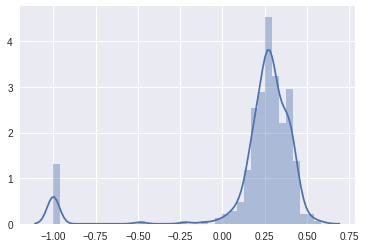

In [286]:
conf = [np.mean(k) for k in confidenceDict['depression'].values()]
sns.distplot(conf)

In [287]:
json.dump(confidenceDict,open('DiseaseConfidence_V2_349.json','wb'))

In [268]:
diseasePrevalence= {'residents':{} , 'prescriptions':{} , 'normalized':{}}

for month in monthDisease:
    for disease in monthDisease[month]:
        if disease not in diseasePrevalence['residents']: 
            diseasePrevalence['residents'][disease] = {}
        if disease not in diseasePrevalence['prescriptions']: 
            diseasePrevalence['prescriptions'][disease] = {}
        if disease not in diseasePrevalence['normalized']: 
            diseasePrevalence['normalized'][disease] = {}
        for district in monthDisease[month][disease]:
            if district not in diseasePrevalence['residents'][disease]: 
                diseasePrevalence['residents'][disease][district] = []
            if district not in diseasePrevalence['prescriptions'][disease]: 
                diseasePrevalence['prescriptions'][disease][district] = []
            if district not in diseasePrevalence['normalized'][disease]: 
                diseasePrevalence['normalized'][disease][district] = []
            try:
                prevalence_citizens = float(monthDisease[month][disease][district])/float(district_pop[district])
            except:
                prevalence_citizens = -1
            try:
                prevalence_prescriptions = float(monthDisease[month][disease][district])/float(AllPresc[month][district]+1.0)
            except:
                prevalence_prescriptions = -1
            try:
                prevalence_normalized = float(monthDisease[month][disease][district])/float((AllPresc[month][district]*district_pop[district]))
            except:
                prevalence_normalized = -1

            diseasePrevalence['residents'][disease][district].append(prevalence_citizens)
            diseasePrevalence['prescriptions'][disease][district].append(prevalence_prescriptions)
            diseasePrevalence['normalized'][disease][district].append(prevalence_normalized)

In [305]:
diseasePrevalence['prescriptions']['diabetes']

{'Adur': [0.058508242500675614,
  0.059015659955257274,
  0.06041136840226654,
  0.05978406353172125,
  0.05984715956173465],
 'Allerdale': [0.05815666145949565,
  0.05816226783968719,
  0.05730671569915069,
  0.059161225294710545,
  0.05949666979571767],
 'Amber Valley': [0.0544957434909588,
  0.054616424883206297,
  0.05445347232868312,
  0.05404757265546546,
  0.055504522879073315],
 'Arun': [0.062336301728653745,
  0.06244368354658497,
  0.062249310955251304,
  0.06348174871714433,
  0.0634423567617722],
 'Ashfield': [0.059310365696821146,
  0.05909870340844138,
  0.05977014961389961,
  0.059080188679245284,
  0.06074646074646075],
 'Ashford': [0.06802721088435375,
  0.06812219500032522,
  0.0673662975362692,
  0.0669712431416921,
  0.06939344334822811],
 'Aylesbury Vale': [0.060880976834417434,
  0.060829493087557605,
  0.060699776487622474,
  0.06131541725601131,
  0.06230310005034884],
 'Babergh': [0.06311957031109189,
  0.061368778280542984,
  0.06071390817153529,
  0.062310137

In [273]:
json.dump(diseasePrevalence,open('DiseasePrevalenceUK_threeMethods_349.json','wb'))

In [274]:
len(diseasePrevalence['prescriptions']['diabetes'])

349

In [275]:
%store -r monthSymptom

[(u'"Anxiety"', 1526301), (u'"Fever"', 1289562), (u'"Edema"', 1063493), (u'"Headache"', 996849), (u'"Foot+pain"', 978697), (u'"Arthritis"', 896310), (u'"Diarrhea"', 835629), (u'"Dry+skin"', 485701), (u'"Chronic+pain"', 456451), (u'"Muscle+pain"', 271887), (u'"Depressive+disorder"', 269323), (u'"Joint+pain"', 241630), (u'"Insomnia"', 215490), (u'"Impotence"', 163846), (u'"Dementia"', 147601), (u'"Parkinson\'s+disease"', 128358), (u'"Hypothyroidism"', 109062), (u'"Itching"', 101008), (u'"Constipation"', 95509), (u'"Nausea"', 90792), (u'"Vertigo"', 53710), (u'"Heartburn"', 44333), (u'"Weight+loss"', 29738), (u'"Parkinsonism"', 27473), (u'"Fatigue"', 23044), (u'"Syncope"', 18065), (u'"Tremor"', 15488), (u'"Restlessness"', 12383), (u'"Backache"', 8763), (u'"Urinary+incontinence"', 7764), (u'"Multiple+sclerosis"', 6206), (u'"Reduced+mobility"', 2060), (u'"Suicidal"', 706), (u'"Kidney+stone"', 83), (u'"Impairment+level+of+vision"', 0), (u'"Dyssomnia"', 0), (u'"Lack+of+energy"', 0), (u'"Mood+s

In [277]:
symptomList= pd.read_csv("../BL_Work/Dis_sym_edited.csv")
symptomList.head()
normId = {}
for index , row in symptomList.iterrows():
    normId[row['norm_UID'].strip()] = row['UID']

In [278]:
normId

{'Abdominal bloating': 116289008,
 'Abdominal pain': 21522001,
 'Abnormal gait': 22325002,
 'Abnormal sexual function': 56925008,
 'Amnesia': 48167000,
 'Anger reaction': 192085004,
 'Anxiety': 48694002,
 'Arthritis': 3723001,
 'Asthenia': 13791008,
 'Backache': 161891005,
 'Blood in urine': 34436003,
 'Blurring of visual image': 111516008,
 'Bowel dysfunction': 235594008,
 'Cannot sleep at all': 248255005,
 'Chronic fatigue syndrome': 52702003,
 'Chronic pain': 82423001,
 'Clouded consciousness': 40917007,
 'Constipation': 14760008,
 'Crying associated with mood': 271951008,
 'Decrease in appetite': 64379006,
 'Delusional disorder': 48500005,
 'Dementia': 52448006,
 'Depressed mood': 366979004,
 'Depressive disorder': 35489007,
 'Diarrhea': 62315008,
 'Difficulty swallowing': 288939007,
 'Disorientated': 62476001,
 'Dizziness': 404640003,
 'Dry skin': 16386004,
 'Dyssomnia': 44186003,
 'Edema': 267038008,
 'Emotional upset': 309838005,
 'Eruption of skin': 271807003,
 'Exhaustion': 60

In [279]:
ID_map = {}
for k in monthSymptom[monthSymptom.keys()[-1]]:
    key = k.replace("\"",'').replace('+',' ')
    ID_map[k]  = normId[key]

In [302]:
sym_total_presc = {}
for month in monthSymptom:
    for disease in monthSymptom[month]:
        disease_presc = np.sum(monthSymptom[month][disease].values())
        if disease in total_presc:
            sym_total_presc[ID_map[disease]]+= disease_presc
        else:
            sym_total_presc[ID_map[disease]] = disease_presc
import operator
sorted_x = sorted(sym_total_presc.items(), key=operator.itemgetter(1),reverse=                 True)
print sorted_x

[(48694002, 1526301), (386661006, 1289562), (267038008, 1063493), (25064002, 996849), (47933007, 978697), (3723001, 896310), (62315008, 835629), (16386004, 485701), (82423001, 456451), (68962001, 271887), (35489007, 269323), (57676002, 241630), (193462001, 215490), (397803000, 163846), (52448006, 147601), (49049000, 128358), (40930008, 109062), (418290006, 101008), (14760008, 95509), (422587007, 90792), (399153001, 53710), (16331000, 44333), (89362005, 29738), (32798002, 27473), (84229001, 23044), (271594007, 18065), (26079004, 15488), (162221009, 12383), (161891005, 8763), (165232002, 7764), (24700007, 6206), (8510008, 2060), (267073005, 706), (95570007, 83), (50219008, 0), (62507009, 0), (224960004, 0), (422400008, 0), (72405004, 0), (40917007, 0), (102911000, 0), (271807003, 0), (248255005, 0), (15188001, 0), (289195008, 0), (60862001, 0), (387603000, 0), (18963009, 0), (192085004, 0), (21522001, 0), (248274002, 0), (79890006, 0), (48167000, 0), (77692006, 0), (275921007, 0), (41836

In [303]:
json.dump(sym_total_presc,open('symptom_prescription_list.json','wb'))

In [280]:
# monthSymptom

In [284]:
confidenceSym = {}
for k in monthSymptom:
    for disease in monthSymptom[k]:
        if disease not in confidenceSym:
            confidenceSym[disease] = {}
            confidenceSym[disease]['NormID'] = ID_map[disease]
            confidenceSym[disease]['confidence'] = {}
        prescription_vals = monthSymptom[k][disease].values()
        mean_uk = np.mean([np.log10(f+1.0) for f in prescription_vals])
        std_uk = np.std([np.log10(f+1.0) for f in prescription_vals])
        confidenceThresh = mean_uk - 2*std_uk
        for area in monthSymptom[k][disease]:
            if area not in confidenceSym[disease]['confidence']:
                confidenceSym[disease]['confidence'][area] = []
            confidence = (np.log10(monthSymptom[k][disease][area]+1.0)/(confidenceThresh+1.0))-1
            if np.isnan(confidence):
                confidence = -99
#             if confidenceThresh > 0:
#                 if np.log10(monthSymptom[k][disease][area]+1) < confidenceThresh:
#                     confidenceflag = False
#                 else:
#                     confidenceflag = True
#             else:
#                 confidenceflag = False
            confidenceSym[disease]['confidence'][area].append(confidence)
print confidenceSym
    

{u'"Impairment+level+of+vision"': {'confidence': {'Mendip': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Hastings': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Rhondda Cynon Taf': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Wyre Forest': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Peterborough': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Epping Forest': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Blaenau Gwent': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Hambleton': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Flintshire': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Dudley': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Barnet': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Stroud': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Tonbridge and Malling': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Tower Hamlets': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Cotswold': [-1.0, -1.0, -1.0, -1.0, -1.0], 'South Staffordshire': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Ribble Valley': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Warwick': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Enfield': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Basildon': [-1.0, -1.0, -1.0, -1.0, -1.0], 'Castle Point': [

In [288]:
json.dump(confidenceSym,open('SymtomConfidence_with_normID_349.json','wb'))

In [295]:
SymptomPrevalence= {'residents':{} , 'prescriptions':{} , 'normalized':{}, 'normIDMapping' : ID_map }

for month in monthSymptom:
    for disease in monthSymptom[month]:
        if disease not in SymptomPrevalence['residents']: 
            SymptomPrevalence['residents'][disease] = {}
        if disease not in SymptomPrevalence['prescriptions']: 
            SymptomPrevalence['prescriptions'][disease] = {}
        if disease not in SymptomPrevalence['normalized']: 
            SymptomPrevalence['normalized'][disease] = {}
        for district in monthSymptom[month][disease]:
            if district not in SymptomPrevalence['residents'][disease]: 
                SymptomPrevalence['residents'][disease][district] = []
            if district not in SymptomPrevalence['prescriptions'][disease]: 
                SymptomPrevalence['prescriptions'][disease][district] = []
            if district not in SymptomPrevalence['normalized'][disease]: 
                SymptomPrevalence['normalized'][disease][district] = []
            try:
                prevalence_citizens = float(monthSymptom[month][disease][district])/float(district_pop[district])
            except:
                prevalence_citizens = -1
            try:
                prevalence_prescriptions = float(monthSymptom[month][disease][district])/float(AllPresc[month][district])
            except:
                prevalence_prescriptions = -1
            try:
                prevalence_normalized = float(monthSymptom[month][disease][district])/float((AllPresc[month][district]*district_pop[district]))
            except:
                prevalence_normalized = -1

            SymptomPrevalence['residents'][disease][district].append(prevalence_citizens)
            SymptomPrevalence['prescriptions'][disease][district].append(prevalence_prescriptions)
            SymptomPrevalence['normalized'][disease][district].append(prevalence_normalized)

In [297]:
UK_wide_prevalence = {}
for k in monthSymptom:
    for disease in monthSymptom[k]:
        if disease not in UK_wide_prevalence:
            UK_wide_prevalence[disease] = {}
            UK_wide_prevalence[disease]['prevalence'] = []
            UK_wide_prevalence[disease]['normId'] = ID_map[disease]
        all_disease_presc = np.sum(monthSymptom[k][disease].values())
        all_presc = np.sum(AllPresc[k].values())
#         print "Total Presc %d , Presc for disease %s are %d"%(all_presc , disease , all_disease_presc)
        UK_wide_prevalence[disease]['prevalence'].append(float(all_disease_presc)/float(all_presc))

In [291]:
print UK_wide_prevalence

{u'"Impairment+level+of+vision"': {'normId': 361122008, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Backache"': {'normId': 161891005, 'prevalence': [0.00047001593039791806, 0.00047647592756531256, 0.000472806974822747, 0.0004819976616535146, 0.00048126129011636607]}, u'"Dyssomnia"': {'normId': 44186003, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Lack+of+energy"': {'normId': 248274002, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Mood+swings"': {'normId': 18963009, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Tired"': {'normId': 224960004, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Weight+gain"': {'normId': 8943002, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Emotional+upset"': {'normId': 309838005, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Disorientated"': {'normId': 62476001, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Clouded+consciousness"': {'normId': 40917007, 'prevalence': [0.0, 0.0, 0.0, 0.0, 0.0]}, u'"Stomach+ache"': {'normId': 271681002, 'prevalence': [0.0, 0.0, 0.0,

In [300]:
json.dump(SymptomPrevalence,open('UK_Symptom_prevalence.json','wb'))

In [293]:
SymptomPrevalence['normIDMapping']

{u'"Abdominal+bloating"': 116289008,
 u'"Abdominal+pain"': 21522001,
 u'"Abnormal+gait"': 22325002,
 u'"Abnormal+sexual+function"': 56925008,
 u'"Amnesia"': 48167000,
 u'"Anger+reaction"': 192085004,
 u'"Anxiety"': 48694002,
 u'"Arthritis"': 3723001,
 u'"Asthenia"': 13791008,
 u'"Backache"': 161891005,
 u'"Blood+in+urine"': 34436003,
 u'"Blurring+of+visual+image"': 111516008,
 u'"Bowel+dysfunction"': 235594008,
 u'"Cannot+sleep+at+all"': 248255005,
 u'"Chronic+fatigue+syndrome"': 52702003,
 u'"Chronic+pain"': 82423001,
 u'"Clouded+consciousness"': 40917007,
 u'"Constipation"': 14760008,
 u'"Crying+associated+with+mood"': 271951008,
 u'"Decrease+in+appetite"': 64379006,
 u'"Delusional+disorder"': 48500005,
 u'"Dementia"': 52448006,
 u'"Depressed+mood"': 366979004,
 u'"Depressive+disorder"': 35489007,
 u'"Diarrhea"': 62315008,
 u'"Difficulty+swallowing"': 288939007,
 u'"Disorientated"': 62476001,
 u'"Dizziness"': 404640003,
 u'"Dry+skin"': 16386004,
 u'"Dyssomnia"': 44186003,
 u'"Edema"'

In [294]:
# json.dump(SymptomPrevalence,open('SymptomPrevalenceUK_threeMethods_withNormID.json','wb'))

In [66]:
%store -r DiseaseDrugMatchDict

In [69]:
diseaseDrugs = {}
for k in DiseaseDrugMatchDict:
    if DiseaseDrugMatchDict[k]['disease'][0] not in diseaseDrugs:
        diseaseDrugs[DiseaseDrugMatchDict[k]['disease'][0]] = 1
    else:
        diseaseDrugs[DiseaseDrugMatchDict[k]['disease'][0]] += 1

In [76]:
%store -r SymDrugMatchDict

In [77]:
symDrugs = {}
for k in SymDrugMatchDict:
    if SymDrugMatchDict[k]['disease'][0] not in symDrugs:
        symDrugs[SymDrugMatchDict[k]['disease'][0]] = 1
    else:
        symDrugs[SymDrugMatchDict[k]['disease'][0]] += 1

In [78]:
symDrugs

{u'"Anxiety"': 47,
 u'"Arthritis"': 65,
 u'"Backache"': 3,
 u'"Chronic+pain"': 18,
 u'"Constipation"': 11,
 u'"Dementia"': 18,
 u'"Depressive+disorder"': 11,
 u'"Diarrhea"': 53,
 u'"Dry+skin"': 48,
 u'"Edema"': 80,
 u'"Fatigue"': 6,
 u'"Fever"': 73,
 u'"Foot+pain"': 104,
 u'"Headache"': 45,
 u'"Heartburn"': 1,
 u'"Hypothyroidism"': 4,
 u'"Impotence"': 5,
 u'"Insomnia"': 11,
 u'"Irritable+bowel+syndrome"': 1,
 u'"Itching"': 11,
 u'"Joint+pain"': 19,
 u'"Kidney+stone"': 2,
 u'"Multiple+sclerosis"': 9,
 u'"Muscle+pain"': 12,
 u'"Muscle+weakness"': 1,
 u'"Nausea"': 13,
 u'"Pain"': 1,
 u'"Parkinson\'s+disease"': 8,
 u'"Parkinsonism"': 3,
 u'"Reduced+mobility"': 2,
 u'"Restlessness"': 1,
 u'"Suicidal"': 1,
 u'"Swelling"': 1,
 u'"Syncope"': 16,
 u'"Tremor"': 1,
 u'"Urinary+incontinence"': 1,
 u'"Vertigo"': 2,
 u'"Weight+loss"': 1}

In [88]:
import seaborn as sns

In [89]:
import numpy as np
import matplotlib.pyplot as plt
labels = sorted(diseaseDrugs, key=lambda k: diseaseDrugs[k],reverse=True)
values = sorted(diseaseDrugs.values(),reverse=True)

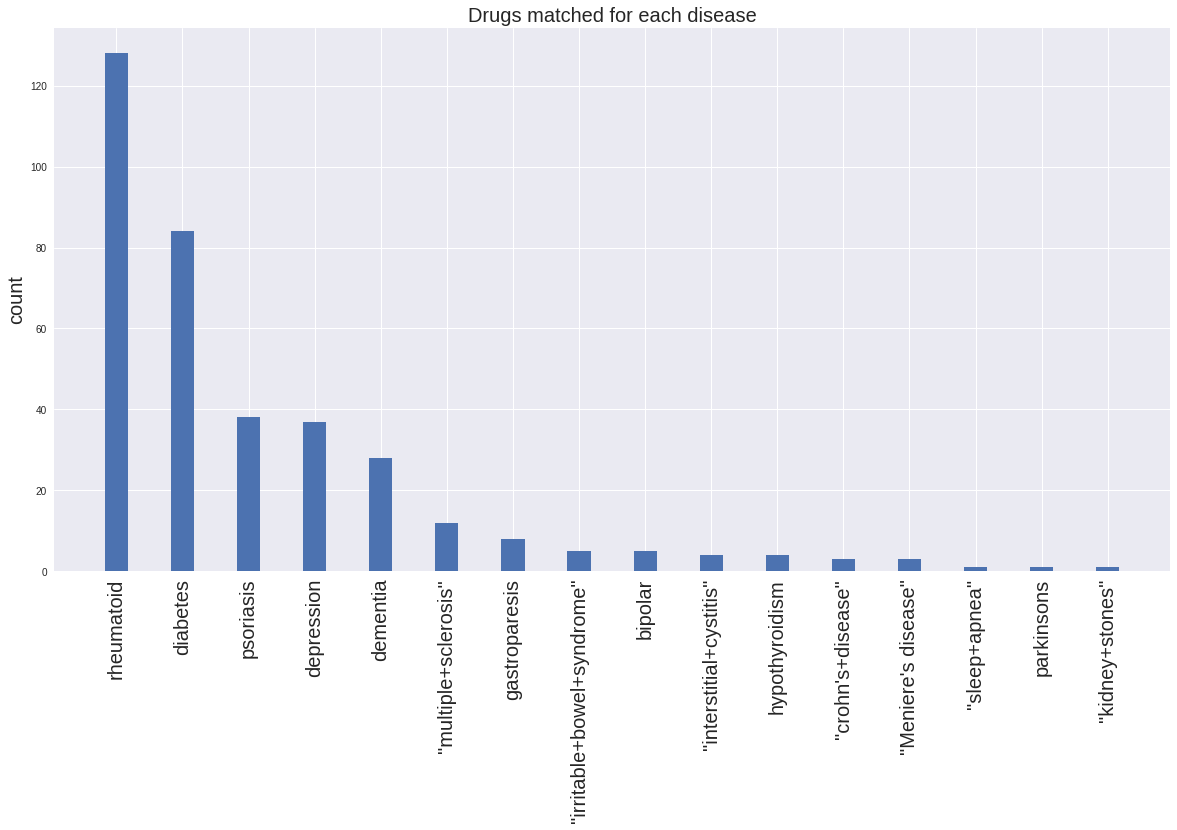

In [92]:
plt.figure(figsize=(20,10))
ind = np.arange(len(values))
width = 0.35
p1 = plt.bar(ind, values, width)
plt.ylabel('count',fontsize='20')
plt.title('Drugs matched for each disease',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()

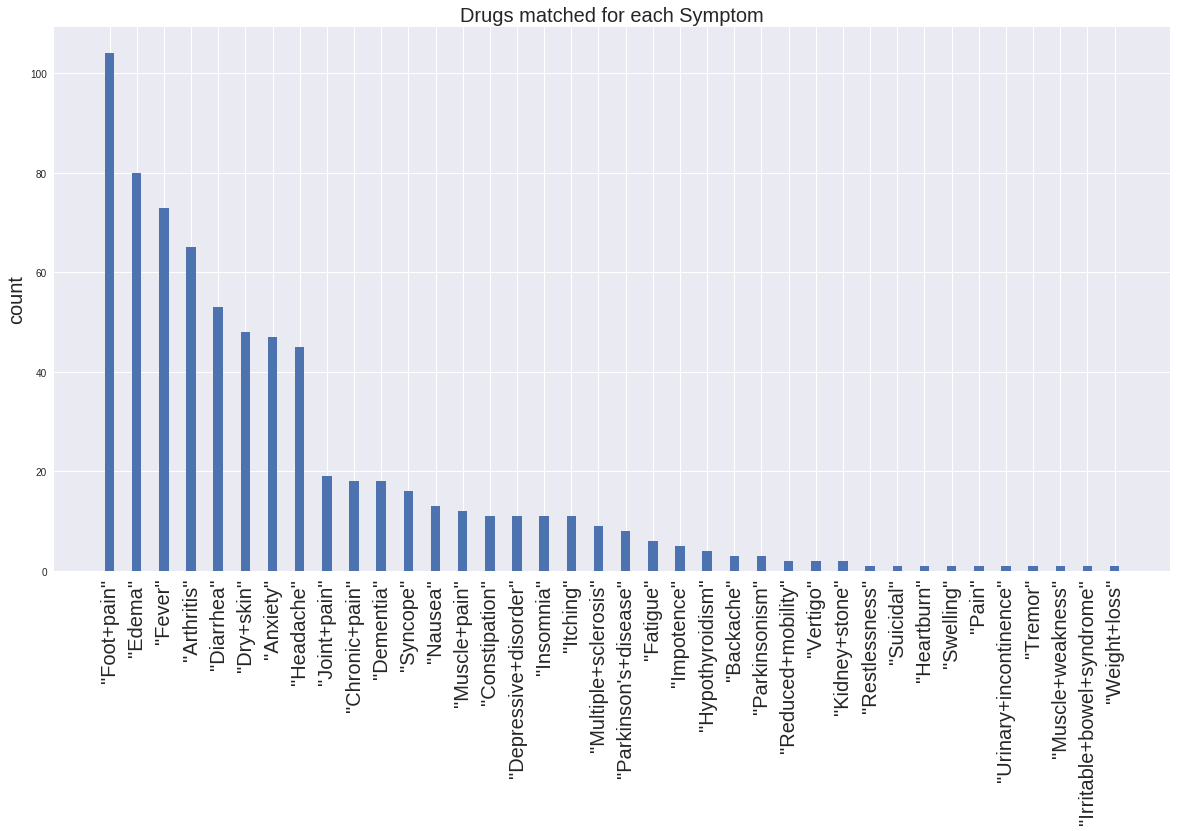

In [94]:
labels = sorted(symDrugs, key=lambda k: symDrugs[k],reverse=True)
values = sorted(symDrugs.values(),reverse=True)
plt.figure(figsize=(20,10))
ind = np.arange(len(values))
width = 0.35
p1 = plt.bar(ind, values, width)
plt.ylabel('count',fontsize='20')
plt.title('Drugs matched for each Symptom',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()

In [95]:
SymDrugMatchDict

{'0101010B0': {'chemName': 'Almasilate', 'disease': [u'"Diarrhea"']},
 '0101010M0': {'chemName': 'Magaldrate', 'disease': [u'"Diarrhea"']},
 '0102000AB': {'chemName': 'Hyoscyamine Sulphate', 'disease': [u'"Syncope"']},
 '0102000AC': {'chemName': 'Atropine Sulphate', 'disease': [u'"Joint+pain"']},
 '0102000AD': {'chemName': 'Pinaverium Bromide',
  'disease': [u'"Irritable+bowel+syndrome"']},
 '0102000AF': {'chemName': 'Prucalopride', 'disease': [u'"Constipation"']},
 '0102000AG': {'chemName': 'Tegaserod Maleate',
  'disease': [u'"Constipation"']},
 '0102000F0': {'chemName': 'Atropine Methonitrate',
  'disease': [u'"Joint+pain"']},
 '0102000H0': {'chemName': 'Belladonna Alkaloids', 'disease': [u'"Fatigue"']},
 '0102000L0': {'chemName': 'Glycopyrronium Bromide',
  'disease': [u'"Syncope"']},
 '0103010D0': {'chemName': 'Cimetidine', 'disease': [u'"Diarrhea"']},
 '0103010E0': {'chemName': 'Cimetidine With Alginate',
  'disease': [u'"Diarrhea"']},
 '0103010H0': {'chemName': 'Famotidine', 'di

In [102]:
symDrugCount = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    logger.debug("Working with %s month",(month))
    pdp = pd.read_csv(f,compression='gzip')
    groups = pdp.groupby('11')
    for name , group in groups:
        if name in SymDrugMatchDict:
            if SymDrugMatchDict[name]['chemName'] in symDrugCount:
                symDrugCount[ SymDrugMatchDict[name]['chemName']] += len(group)
            else:
                symDrugCount[ SymDrugMatchDict[name]['chemName']] = len(group)


  0%|          | 0/5 [00:00<?, ?it/s]
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 148, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


100%|██████████| 5/5 [02:10<00:00, 26.01s/it]


In [99]:
diseaseDrug = {}
for f in tqdm(files):
    month = f.split('/')[-1].split('.')[0]
    logger.debug("Working with %s month",(month))
    pdp = pd.read_csv(f,compression='gzip')
    groups = pdp.groupby('11')
    for name , group in groups:
        if name in DiseaseDrugMatchDict:
            if DiseaseDrugMatchDict[name]['chemName'] in diseaseDrug:
                diseaseDrug[DiseaseDrugMatchDict[name]['chemName']] += len(group)
            else:
                diseaseDrug[ DiseaseDrugMatchDict[name]['chemName']] = len(group)

100%|██████████| 5/5 [02:11<00:00, 26.36s/it]


In [100]:
diseaseDrug

{'Adalimumab': 64,
 'Alimemazine Tartrate': 18720,
 'Alprazolam': 2,
 'Amantadine Hydrochloride': 18956,
 'Amitriptyline Hydrochloride': 140172,
 'Amoxapine': 5,
 'Anakinra': 5,
 'Aripiprazole': 64581,
 'Atorvastatin': 173280,
 'Auranofin': 26,
 'Azathioprine': 69757,
 'Baclofen': 56655,
 'Betahistine Hydrochloride': 85693,
 'Betamethasone': 1430,
 'Betamethasone Esters': 78295,
 'Betamethasone Sodium Phosphate': 62697,
 'Betamethasone Valerate': 351962,
 'Bromocriptine': 6626,
 'Bupivacaine Hydrochloride': 1619,
 'Buspirone Hydrochloride': 21302,
 'Carbamazepine': 279848,
 'Celecoxib': 54043,
 'Chloramphenicol': 92287,
 'Chlordiazepoxide Hydrochloride': 35214,
 'Chloroquine Phosphate': 1165,
 'Chloroquine Phosphate with Proguanil HCl': 222,
 'Chloroquine Sulphate': 144,
 'Chlorphenamine Maleate': 115967,
 'Chlorpromazine Hydrochloride': 60663,
 'Ciclosporin': 52267,
 'Citalopram Hydrobromide': 134108,
 'Citalopram Hydrochloride': 15658,
 'Clomipramine Hydrochloride': 67025,
 'Clonazep

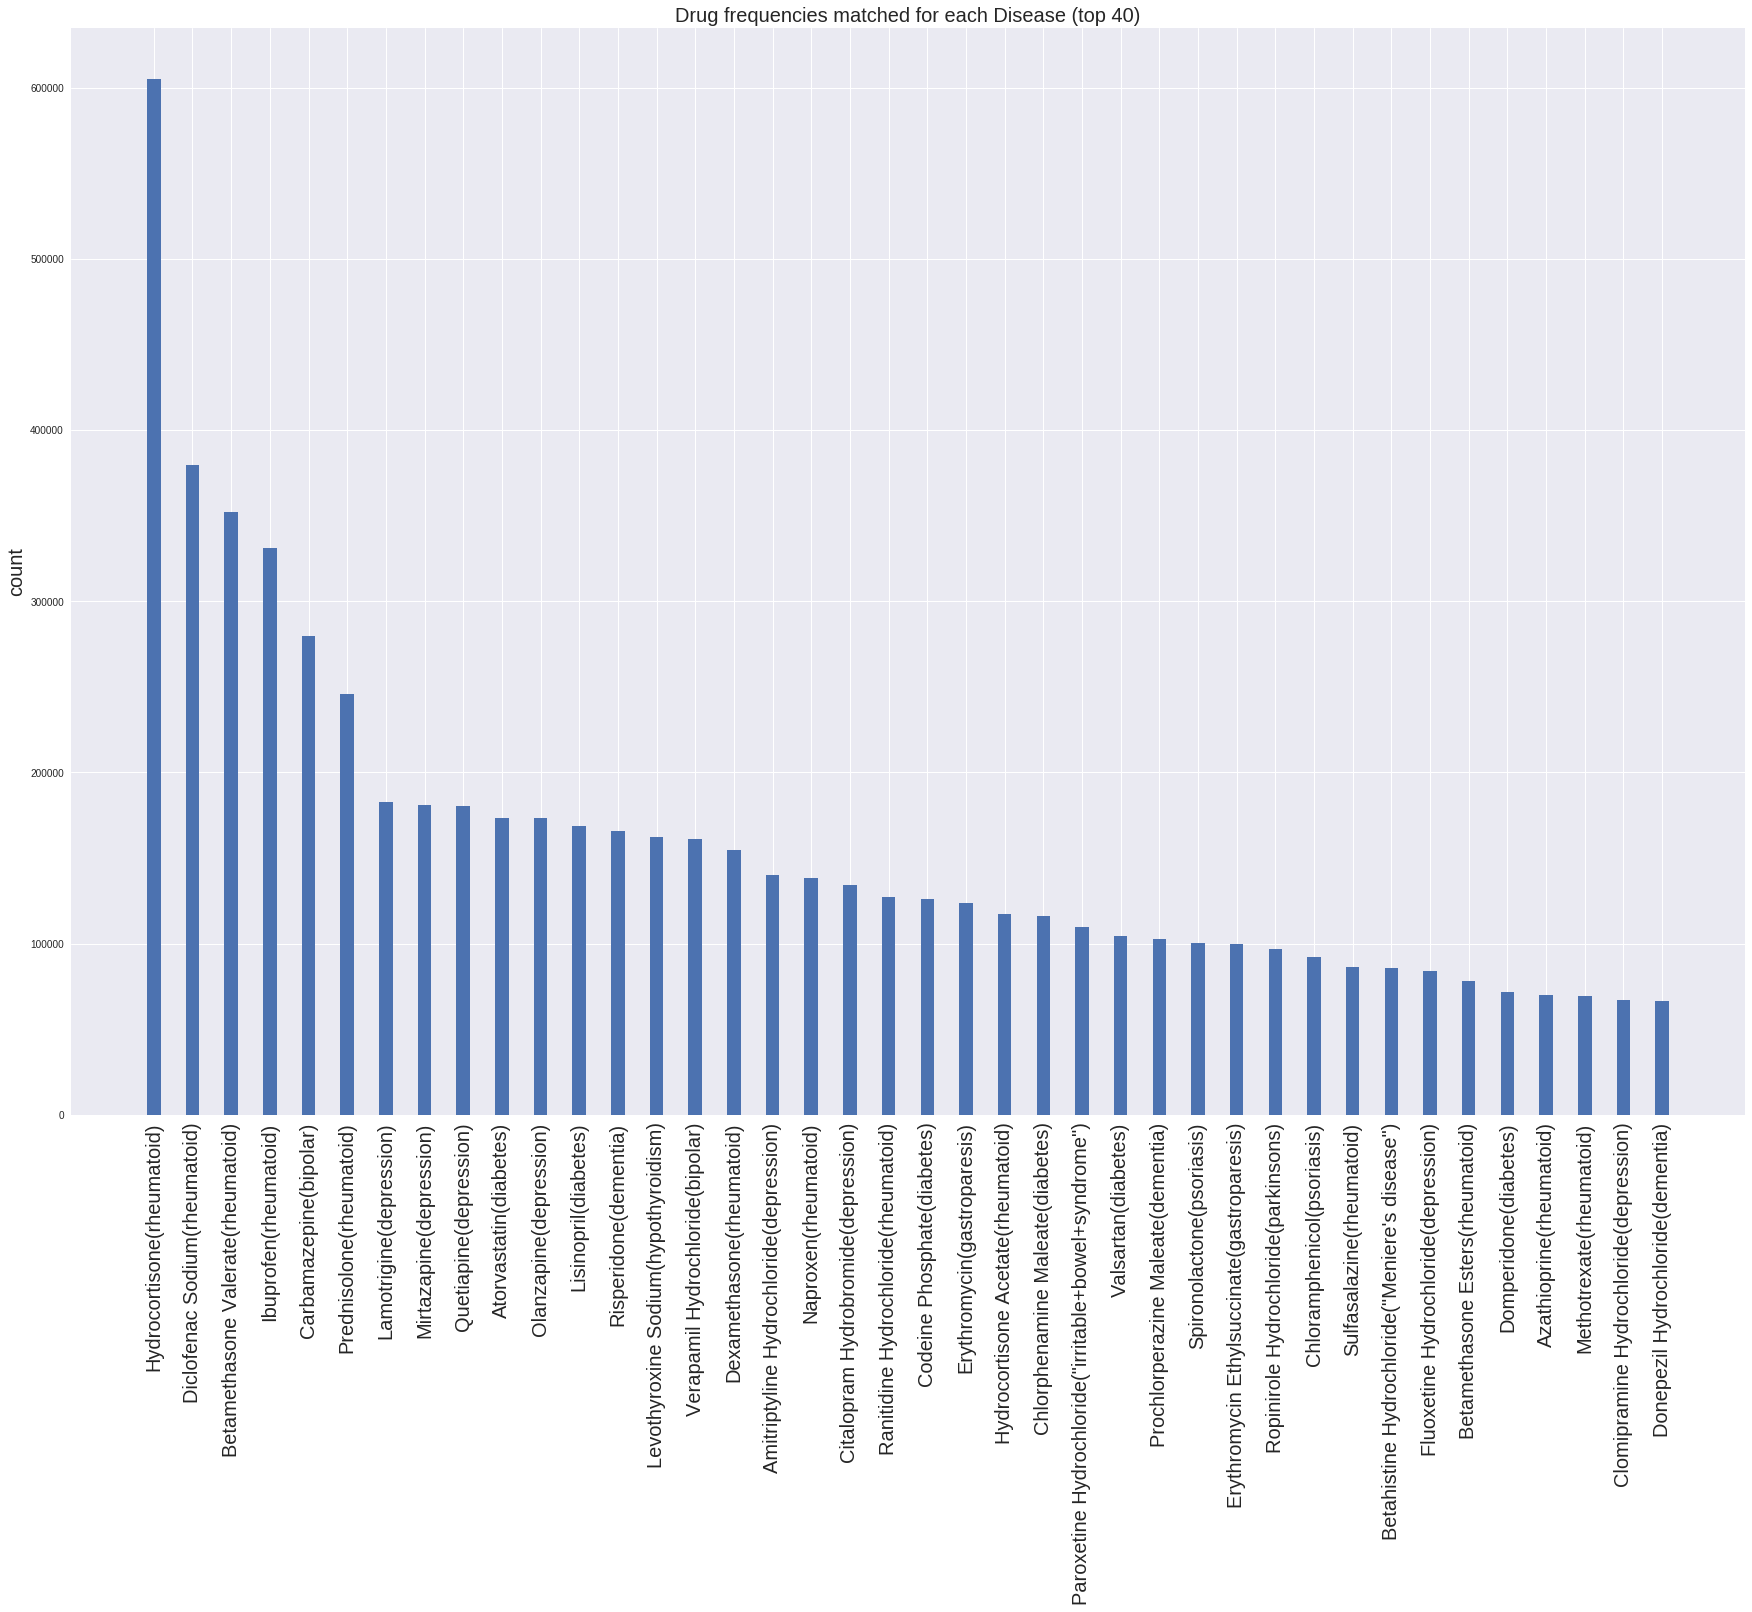

In [113]:
labels = sorted(diseaseDrug, key=lambda k: diseaseDrug[k],reverse=True)
values = sorted(diseaseDrug.values(),reverse=True)
mapping = {}
for k in DiseaseDrugMatchDict:
    mapping[DiseaseDrugMatchDict[k]['chemName']] = DiseaseDrugMatchDict[k]['disease'][0]
labels = [l + "("+mapping[l] + ")" for l in labels ]
plt.figure(figsize=(30,20))
ind = np.arange(len(values[:40]))
width = 0.35
p1 = plt.bar(ind, values[:40], width)
plt.ylabel('count',fontsize='20')
plt.title('Drug frequencies matched for each Disease (top 40)',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()

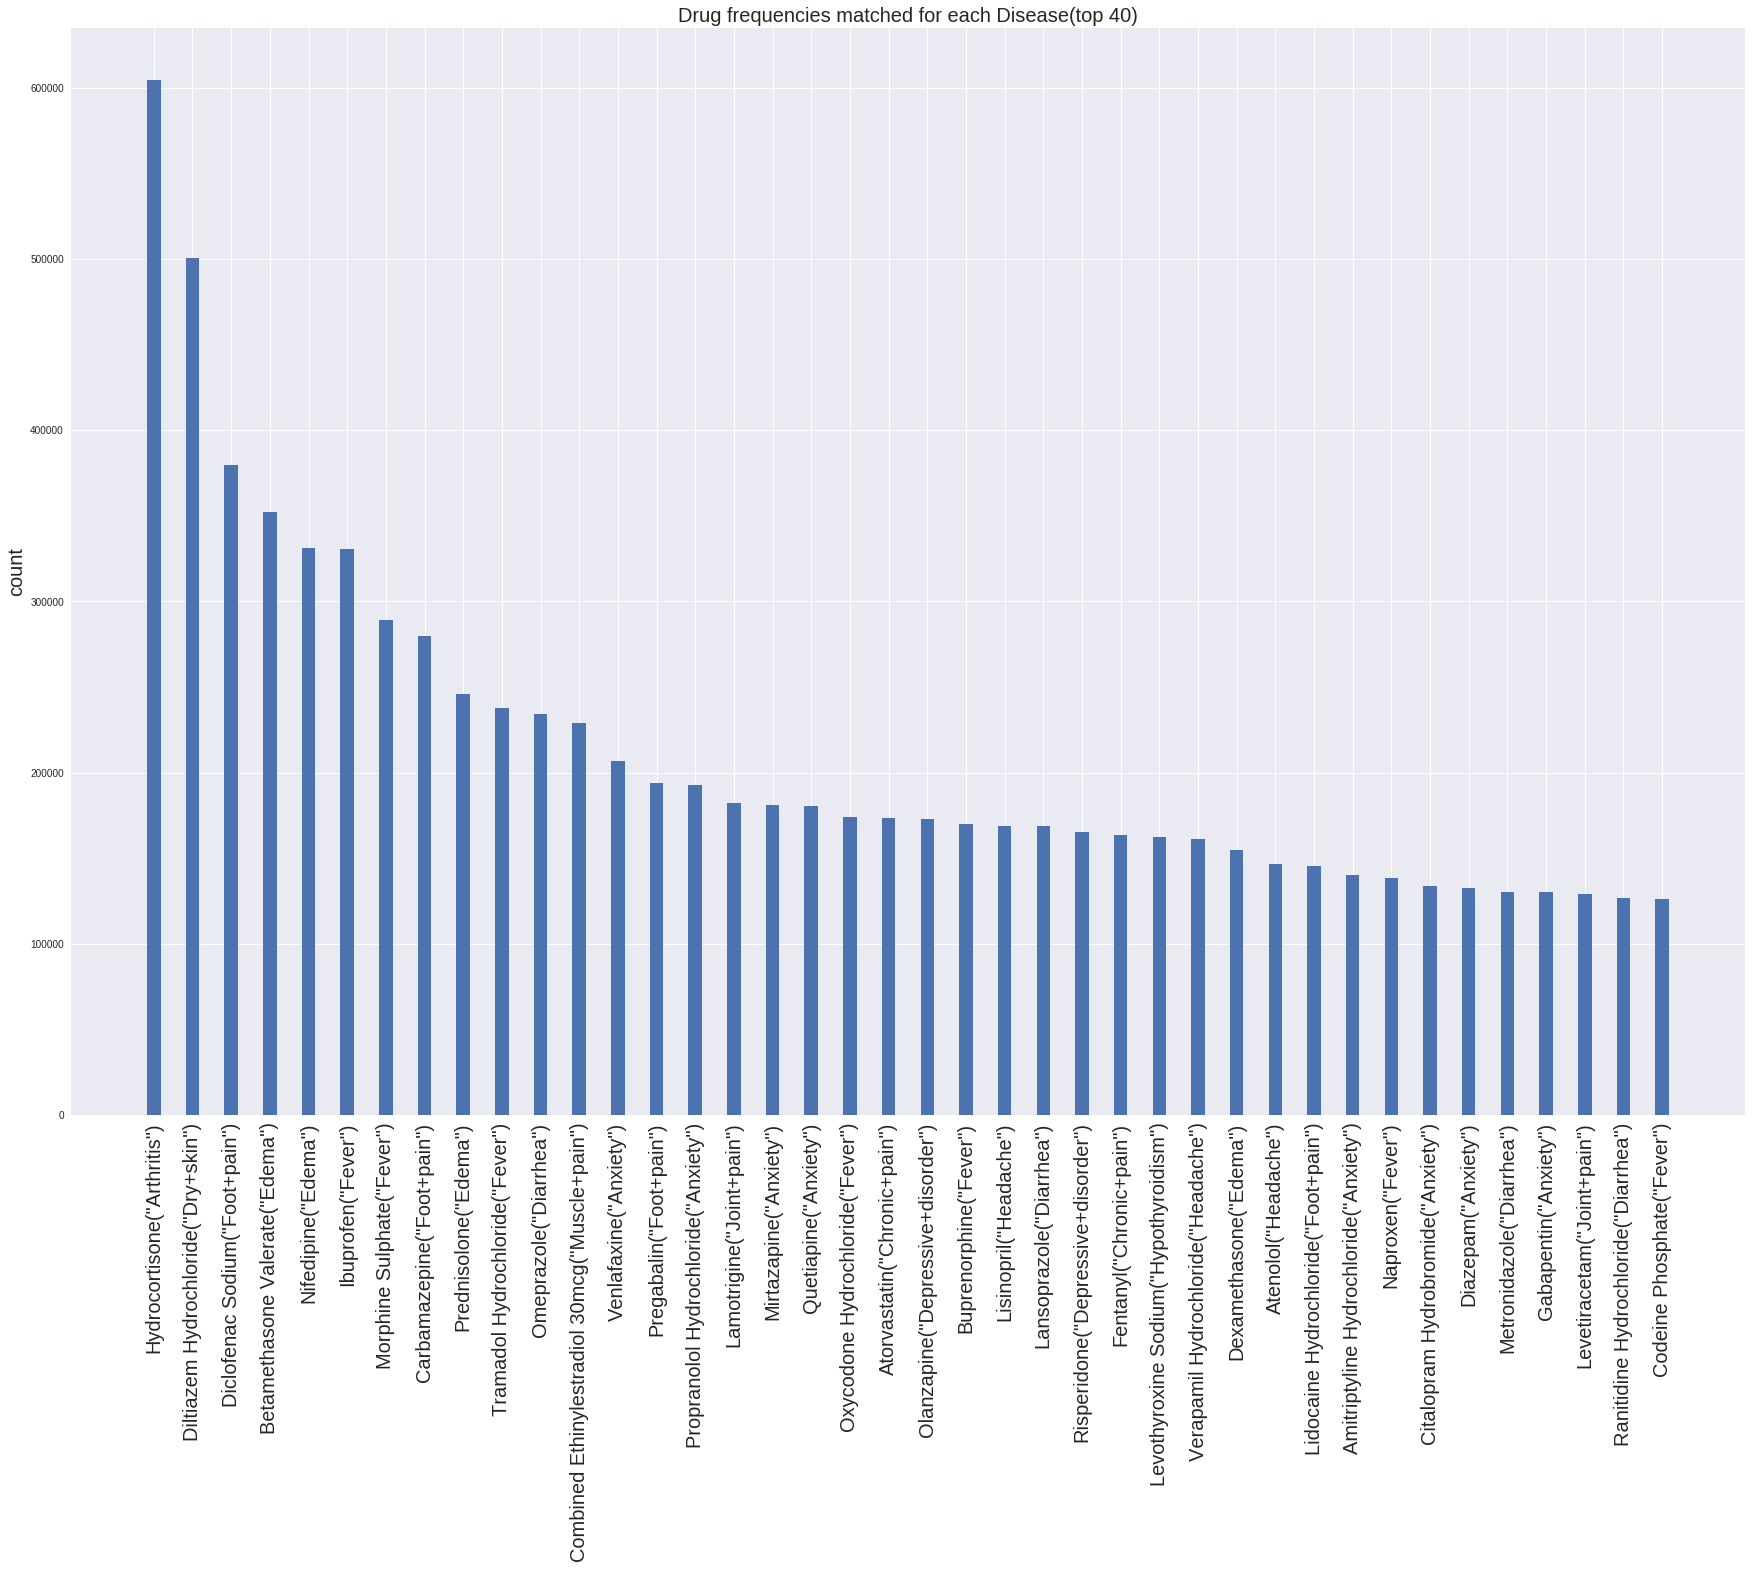

In [115]:
labels = sorted(symDrugCount, key=lambda k: symDrugCount[k],reverse=True)
values = sorted(symDrugCount.values(),reverse=True)
mapping = {}
for k in SymDrugMatchDict:
    mapping[SymDrugMatchDict[k]['chemName']] = SymDrugMatchDict[k]['disease'][0]
labels = [l + "("+mapping[l] + ")" for l in labels ]
plt.figure(figsize=(30,20))
ind = np.arange(len(values[:40]))
width = 0.35
p1 = plt.bar(ind, values[:40], width)
plt.ylabel('count',fontsize='20')
plt.title('Drug frequencies matched for each Disease(top 40)',fontsize='20')
plt.xticks(ind,labels,rotation = 90,fontsize = '20')

plt.show()